In [1]:
#pip install -U textblob

In [2]:
#pip install spacy

In [3]:
#pip install wordcloud

In [4]:
#pip install neattext

In [5]:
#pip install emoji

In [6]:
#pip install langdetect

In [7]:
#texthero 1.1.0 requires gensim<4.0,>=3.6.0, but you have gensim 4.2.0 which is incompatible.
#texthero 1.1.0 requires spacy<3.0.0, but you have spacy 3.4.0 which is incompatible.
#pip install gensim=="3.8.1"
#pip install spacy=="2.3.8"
#pip install texthero 

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import spacy
from spacy import displacy
from collections import Counter
import re
from PIL import Image

In [7]:
# to install en_core_web_sm, in Terminal: python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

Read File

In [8]:
df=pd.read_csv('universal_studio_branches.csv')
df

reviewer  rating       written_date  \
0                   Kelly B     2.0       May 30, 2021   
1                       Jon     1.0       May 30, 2021   
2                   Nerdy P     2.0       May 30, 2021   
3                 ran101278     4.0       May 29, 2021   
4           tammies20132015     5.0       May 28, 2021   
...                     ...     ...                ...   
50899                vinz20     4.0     March 29, 2010   
50900               betty l     4.0     March 29, 2010   
50901             spoonos65     4.0     March 28, 2010   
50902  HeatSeekerWrexham_UK     4.0     March 22, 2010   
50903          sc_myinitial     5.0  February 24, 2010   

                                                   title  \
0      Universal is a complete Disaster - stick with ...   
1                                   Food is hard to get.   
2                                           Disappointed   
3                                             My opinion   
4                      The Bourne Stuntacular...MUST SEE   
...                                                  ...   
50899                           I'll Be Back Only If ...   
50900             Universal Studios Singapore Experience   
50901                 Impressive but not quite finished!   
50902                       Small but beautifully marked   
50903                            Excellent Sneak Preview   

                                             review_text  \
0      We went to Universal over Memorial Day weekend...   
1      The food service is horrible. I’m not reviewin...   
2      I booked this vacation mainly to ride Hagrid m...   
3      When a person tries the test seat for the ride...   
4      Ok, I can't stress enough to anyone and everyo...   
...                                                  ...   
50899  This is my first visit to a Universal Studio t...   
50900  We finally visited Singapore's very first them...   
50901  We visited during the first week of its 'soft ...   
50902  We visited on the 3rd day of the 'soft' openin...   
50903  My group managed to get the tickets for the 16...   

                            branch  
0        Universal Studios Florida  
1        Universal Studios Florida  
2        Universal Studios Florida  
3        Universal Studios Florida  
4        Universal Studios Florida  
...                            ...  
50899  Universal Studios Singapore  
50900  Universal Studios Singapore  
50901  Universal Studios Singapore  
50902  Universal Studios Singapore  
50903  Universal Studios Singapore  

[50904 rows x 6 columns]

In [9]:
df.tail()

reviewer  rating       written_date  \
50899                vinz20     4.0     March 29, 2010   
50900               betty l     4.0     March 29, 2010   
50901             spoonos65     4.0     March 28, 2010   
50902  HeatSeekerWrexham_UK     4.0     March 22, 2010   
50903          sc_myinitial     5.0  February 24, 2010   

                                        title  \
50899                I'll Be Back Only If ...   
50900  Universal Studios Singapore Experience   
50901      Impressive but not quite finished!   
50902            Small but beautifully marked   
50903                 Excellent Sneak Preview   

                                             review_text  \
50899  This is my first visit to a Universal Studio t...   
50900  We finally visited Singapore's very first them...   
50901  We visited during the first week of its 'soft ...   
50902  We visited on the 3rd day of the 'soft' openin...   
50903  My group managed to get the tickets for the 16...   

                            branch  
50899  Universal Studios Singapore  
50900  Universal Studios Singapore  
50901  Universal Studios Singapore  
50902  Universal Studios Singapore  
50903  Universal Studios Singapore

Summary of data

In [10]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  50904
Columns  :  6

Features : 
 ['reviewer', 'rating', 'written_date', 'title', 'review_text', 'branch']

Missing values :   0

Unique values :  
 reviewer        44086
rating              5
written_date     4276
title           37522
review_text     50847
branch              3
dtype: int64


In [11]:
df['branch'].value_counts()

Universal Studios Florida      30621
Universal Studios Singapore    15754
Universal Studios Japan         4529
Name: branch, dtype: int64

In [12]:
# check total redundant data 
df[df.duplicated(subset=['reviewer','title', 'review_text', 'branch'])].head(5)

reviewer  rating       written_date  \
633   michaelg999969     1.0  February 24, 2020   
2500         sdombar     4.0     April 24, 2019   
2501     Princess279     5.0     April 23, 2019   
2502      Terrence S     5.0     April 23, 2019   
2503         Fanny L     5.0     April 23, 2019   

                                                  title  \
633                                   "Amusement" Park?   
2500                                  Universal Studios   
2501  The Cinematic Celebration show itself is worth it   
2502                 2 parks in one day - it's possible   
2503                                         Amazing!!!   

                                            review_text  \
633   My wife and I have been to Disney MULTIPLE tim...   
2500  Did the 4 day pass at Universal. We had a grea...   
2501  My sons and I are movie goers, so it was very ...   
2502  We read a lot of discussions if you can do bot...   
2503  What a great place!! Staff is amazing, smiling...   

                         branch  
633   Universal Studios Florida  
2500  Universal Studios Florida  
2501  Universal Studios Florida  
2502  Universal Studios Florida  
2503  Universal Studios Florida

In [13]:
# 1st example of redundant data
df.loc[df['reviewer'] == "sdombar"]

reviewer  rating    written_date              title  \
2490  sdombar     4.0  April 24, 2019  Universal Studios   
2500  sdombar     4.0  April 24, 2019  Universal Studios   

                                            review_text  \
2490  Did the 4 day pass at Universal. We had a grea...   
2500  Did the 4 day pass at Universal. We had a grea...   

                         branch  
2490  Universal Studios Florida  
2500  Universal Studios Florida

In [14]:
# 2nd example of redundant data
df.loc[df['reviewer'] == "michaelg999969"]

reviewer  rating       written_date              title  \
128  michaelg999969     1.0     March 28, 2021  "Amusement" Park?   
633  michaelg999969     1.0  February 24, 2020  "Amusement" Park?   

                                           review_text  \
128  My wife and I have been to Disney MULTIPLE tim...   
633  My wife and I have been to Disney MULTIPLE tim...   

                        branch  
128  Universal Studios Florida  
633  Universal Studios Florida

In [15]:
# dropping redundant data
#decision to include written_date in the duplicate check
df.drop_duplicates(subset=['reviewer', 'written_date','title', 'review_text', 'branch'], keep=False,inplace=True)

In [16]:
# check redundant data - successful
dp = df.duplicated(subset=['reviewer','written_date', 'title', 'review_text', 'branch']).sum()
print("Data Duplication: ", dp)

Data Duplication:  0


In [17]:
#new summary of dataset after removal of duplicates

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  50814
Columns  :  6

Features : 
 ['reviewer', 'rating', 'written_date', 'title', 'review_text', 'branch']

Missing values :   0

Unique values :  
 reviewer        44048
rating              5
written_date     4255
title           37493
review_text     50802
branch              3
dtype: int64


In [18]:
df['branch'].value_counts()

Universal Studios Florida      30553
Universal Studios Singapore    15732
Universal Studios Japan         4529
Name: branch, dtype: int64

In [19]:
#detect non-english reviews
from langdetect import detect

def detect_en(text):
    if detect(text['review_text']) == 'en':
        return True
    else:
        return False

df['en'] = df.apply(detect_en,axis=1)

In [20]:
df['en'].value_counts()

In [21]:
#manual check non-english reviews in csv
df_not_en = df[df['en']==False]

df_not_en.to_csv('df_not_en.csv')

In [22]:
#list of non-english reviews manually added
index_not_en = [3337,3943,14123,29224,32092,32333,32632,33083,33746,34000,34194,34259,35404,35802,38295,41295,41306,41964,42103,43643,44472,46377,46607,46654,47247]
df.loc[index_not_en]

reviewer  rating        written_date  \
3337     pavliuskaao     5.0    January 15, 2019   
3943         Marek F     5.0    October 31, 2018   
14123    KennethY_HK     4.0       July 16, 2016   
29224    Dominique M     3.0     January 6, 2012   
32092       erikamix     5.0      August 1, 2017   
32333         Lily H     5.0      April 28, 2017   
32632     Dollinatty     5.0     January 1, 2017   
33083      suttichai     5.0       July 20, 2016   
33746   jimcabauatan     5.0   December 11, 2015   
34000       solatabi     5.0     August 30, 2015   
34194       Palmyday     5.0        June 1, 2015   
34259       vanapong     5.0         May 4, 2015   
35404         Ko Win     3.0    January 11, 2020   
35802            M.M     4.0  September 20, 2019   
38295        reoku68     5.0   February 28, 2018   
41295  thanyawan2015     5.0     August 28, 2016   
41306      พิบูลย์ อ     5.0     August 26, 2016   
41964             小栢     5.0       June 15, 2016   
42103    rusdiazhari     5.0        May 25, 2016   
43643         Bewjii     5.0    October 26, 2015   
44472   senaykaratas     5.0       July 20, 2015   
46377      Woraanong     5.0     October 2, 2014   
46607       vanapong     5.0     August 22, 2014   
46654        sj_papa     4.0     August 11, 2014   
47247         Raja B     5.0      April 21, 2014   

                                                   title  \
3337                                            Awesome!   
3943                                      Best best best   
14123                                             期望大於實際   
29224                                        Du déjà vu!   
32092                                Lovely and fun time   
32333  If you are looking for fun and adventure, this...   
32632                               USJ The Must to Go!!   
33083  แบกเป้สะพายกล้องท่องเที่ยว Universal Studio Japan   
33746      Universal Studio Japan :ตะลุยแดน Harry Potter   
34000                                       バックドロップ最高！！！   
34194                           อย่าพลาดโซน Harry Potter   
34259            สวนสนุกระดับโลก Universal Studios Japan   
35404                                      USS Singapore   
35802                               Efficient theme park   
38295                                       USS ครั้งแรก   
41295          ตื่นเต้นไปกับ Universal studios Singapore   
41306                      ยูนิเวอร์ซัล สตูดิโอ สิงคโปร์   
41964                                               樂不思蜀   
42103                                     TRIP TO USS!!!   
43643                                             Bewjii   
44472                               Entertainment Island   
46377                    สนุกสุดๆ คุ้มค่ากับราคาตั๋วมากๆ   
46607        สวนสนุกระดับโลก Universal Studios Singapore   
46654                                       大人でも１日楽しめました   
47247            Wahana dan Pertunjukan yang Menakjubkan   

                                             review_text  \
3337   I love Universal . Always want more . Our girl...   
3943   Musite zažit... Atrakce paradička Doporučujeme...   
14123  一連兩天環球影城的兩個樂園，相對island of adventure就失色了，雖然人流比較...   
29224  J'y étais déjà allé à l'âge de 6 ans et rien a...   
32092  It was very nice and fun place. It's not huge ...   
32333  超級棒的樂園，滿足小朋友對可愛的東西及遊戲的需求，也能讓大人及大小孩有刺激的遊戲可以選擇！ ...   
32632  USJ ธีมพาร์คที่มาจากภาพยนตร์ทั้ง Harry Potter,...   
33083  เมื่อครั้งที่ผมไปเที่ยวญี่ปุ่น นอกจากแวะไปเที่...   
33746  อย่าพลาด The world's most magical adventure br...   
34000  ユニバーサル・クールジャパンの「EVANGELION THE REAL 4D」と、3D化した...   
34194  ฉันคิดว่าเครื่องเล่น Harry Potter and the Forb...   
34259  สถานที่ท่องเที่ยววันนี้ก็คือสวนสนุกระดับโลก Un...   
35404  Universal Studios Singapore 在景点買票要S$81 , 但是 在 ...   
35802  It is more compact than the Universal Studio J...   
38295  ครั้งนี้เราได้ไป USS ครั้งแรก ประทับใจค่ะ สมกั...   
41295  Universal studios Singapore ลงที่ MRT HarbourF...   
41306  ยูนิเวอร์แซล สตูดิโอ ที่แรกและที่เดียวในภูมิภา...   
41964  坦白說，這次到新加坡的

In [23]:
#drop non-english reviews
df.drop(index=index_not_en,inplace=True)
print(f'Removed {len(index_not_en)} non-english reviews')

Removed 25 non-english reviews


In [24]:
df.drop(columns='en',inplace=True)

In [25]:
df

reviewer  rating       written_date  \
0                   Kelly B     2.0       May 30, 2021   
1                       Jon     1.0       May 30, 2021   
2                   Nerdy P     2.0       May 30, 2021   
3                 ran101278     4.0       May 29, 2021   
4           tammies20132015     5.0       May 28, 2021   
...                     ...     ...                ...   
50899                vinz20     4.0     March 29, 2010   
50900               betty l     4.0     March 29, 2010   
50901             spoonos65     4.0     March 28, 2010   
50902  HeatSeekerWrexham_UK     4.0     March 22, 2010   
50903          sc_myinitial     5.0  February 24, 2010   

                                                   title  \
0      Universal is a complete Disaster - stick with ...   
1                                   Food is hard to get.   
2                                           Disappointed   
3                                             My opinion   
4                      The Bourne Stuntacular...MUST SEE   
...                                                  ...   
50899                           I'll Be Back Only If ...   
50900             Universal Studios Singapore Experience   
50901                 Impressive but not quite finished!   
50902                       Small but beautifully marked   
50903                            Excellent Sneak Preview   

                                             review_text  \
0      We went to Universal over Memorial Day weekend...   
1      The food service is horrible. I’m not reviewin...   
2      I booked this vacation mainly to ride Hagrid m...   
3      When a person tries the test seat for the ride...   
4      Ok, I can't stress enough to anyone and everyo...   
...                                                  ...   
50899  This is my first visit to a Universal Studio t...   
50900  We finally visited Singapore's very first them...   
50901  We visited during the first week of its 'soft ...   
50902  We visited on the 3rd day of the 'soft' openin...   
50903  My group managed to get the tickets for the 16...   

                            branch  
0        Universal Studios Florida  
1        Universal Studios Florida  
2        Universal Studios Florida  
3        Universal Studios Florida  
4        Universal Studios Florida  
...                            ...  
50899  Universal Studios Singapore  
50900  Universal Studios Singapore  
50901  Universal Studios Singapore  
50902  Universal Studios Singapore  
50903  Universal Studios Singapore  

[50789 rows x 6 columns]

In [26]:
#new summary of dataset after removal of non-english reviews

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  50789
Columns  :  6

Features : 
 ['reviewer', 'rating', 'written_date', 'title', 'review_text', 'branch']

Missing values :   0

Unique values :  
 reviewer        44024
rating              5
written_date     4255
title           37469
review_text     50777
branch              3
dtype: int64


In [27]:
#assign sentiment based on user rating
#rating 1-3 = negative, rating 4-5 = positive
def getSentiment(score):
 if int(score['rating']) <= 3.0:
  return 'Negative'
 else:
  return 'Positive'
df['sentiment'] = df.apply(getSentiment,axis=1)
df

reviewer  rating       written_date  \
0                   Kelly B     2.0       May 30, 2021   
1                       Jon     1.0       May 30, 2021   
2                   Nerdy P     2.0       May 30, 2021   
3                 ran101278     4.0       May 29, 2021   
4           tammies20132015     5.0       May 28, 2021   
...                     ...     ...                ...   
50899                vinz20     4.0     March 29, 2010   
50900               betty l     4.0     March 29, 2010   
50901             spoonos65     4.0     March 28, 2010   
50902  HeatSeekerWrexham_UK     4.0     March 22, 2010   
50903          sc_myinitial     5.0  February 24, 2010   

                                                   title  \
0      Universal is a complete Disaster - stick with ...   
1                                   Food is hard to get.   
2                                           Disappointed   
3                                             My opinion   
4                      The Bourne Stuntacular...MUST SEE   
...                                                  ...   
50899                           I'll Be Back Only If ...   
50900             Universal Studios Singapore Experience   
50901                 Impressive but not quite finished!   
50902                       Small but beautifully marked   
50903                            Excellent Sneak Preview   

                                             review_text  \
0      We went to Universal over Memorial Day weekend...   
1      The food service is horrible. I’m not reviewin...   
2      I booked this vacation mainly to ride Hagrid m...   
3      When a person tries the test seat for the ride...   
4      Ok, I can't stress enough to anyone and everyo...   
...                                                  ...   
50899  This is my first visit to a Universal Studio t...   
50900  We finally visited Singapore's very first them...   
50901  We visited during the first week of its 'soft ...   
50902  We visited on the 3rd day of the 'soft' openin...   
50903  My group managed to get the tickets for the 16...   

                            branch rating_sentiment  
0        Universal Studios Florida         Negative  
1        Universal Studios Florida         Negative  
2        Universal Studios Florida         Negative  
3        Universal Studios Florida         Positive  
4        Universal Studios Florida         Positive  
...                            ...              ...  
50899  Universal Studios Singapore         Positive  
50900  Universal Studios Singapore         Positive  
50901  Universal Studios Singapore         Positive  
50902  Universal Studios Singapore         Positive  
50903  Universal Studios Singapore         Positive  

[50789 rows x 7 columns]

Get time-series features

In [28]:
#using datetime object to get year, month, weekday and quarter
df['date_object'] = pd.to_datetime(df['written_date'], format='%B %d, %Y')

In [29]:
df['year'] = df['date_object'].dt.year
df['month'] = df['date_object'].dt.month
df['weekday'] = df['date_object'].dt.weekday
df['quarter'] = df['date_object'].dt.quarter

In [30]:
df.head()

reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   

                                         review_text  \
0  We went to Universal over Memorial Day weekend...   
1  The food service is horrible. I’m not reviewin...   
2  I booked this vacation mainly to ride Hagrid m...   
3  When a person tries the test seat for the ride...   
4  Ok, I can't stress enough to anyone and everyo...   

                      branch rating_sentiment date_object  year  month  \
0  Universal Studios Florida         Negative  2021-05-30  2021      5   
1  Universal Studios Florida         Negative  2021-05-30  2021      5   
2  Universal Studios Florida         Negative  2021-05-30  2021      5   
3  Universal Studios Florida         Positive  2021-05-29  2021      5   
4  Universal Studios Florida         Positive  2021-05-28  2021      5   

   weekday  quarter  
0        6        2  
1        6        2  
2        6        2  
3        5        2  
4        4        2

In [31]:
#duplicating review_text column before text preprocessing so we can retain original review text
df['review_og'] = df['review_text']

Get Review Length Feature

In [32]:
df['review_text'].values[2:3]

array(['I booked this vacation mainly to ride Hagrid motorcycle adventure; very disappointing to find out the only way to ride it is through "Virtual line". I\'ve spent my entire vacation trying to find a spot, but always got the same message "No virtual line times left". It seems very strange to me how suddenly the ride changes from 30 minutes wait, to no virtual line times left. I strongly believe that whoever is responsible for running this virtual line, is actually prebooking all the times available throughout the day to whoever they want to. Costumer services is very poor to say the least, and clearly not only doesn\'t care to address my complaints, but also very unapologetic, defiant. It\'s true what I\'ve heard "we are not in Disney, we don\'t have to be nice". Every time we wanted to eat in any location at any park, there was always a huge line waiting to be served or seated. All 3 parks were filthy, trash everywhere. This review probably will not make any difference to Univers

In [33]:
df['review length']=df['review_text'].apply(lambda x:len(x))

In [34]:
df['wordcounts_title'] = df['title'].apply(lambda x: len(str(x).split()))
df['wordcounts_reviewtext'] = df['review_text'].apply(lambda x: len(str(x).split()))

In [35]:
df.head()

reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   

                                         review_text  \
0  We went to Universal over Memorial Day weekend...   
1  The food service is horrible. I’m not reviewin...   
2  I booked this vacation mainly to ride Hagrid m...   
3  When a person tries the test seat for the ride...   
4  Ok, I can't stress enough to anyone and everyo...   

                      branch rating_sentiment date_object  year  month  \
0  Universal Studios Florida         Negative  2021-05-30  2021      5   
1  Universal Studios Florida         Negative  2021-05-30  2021      5   
2  Universal Studios Florida         Negative  2021-05-30  2021      5   
3  Universal Studios Florida         Positive  2021-05-29  2021      5   
4  Universal Studios Florida         Positive  2021-05-28  2021      5   

   weekday  quarter                                          review_og  \
0        6        2  We went to Universal over Memorial Day weekend...   
1        6        2  The food service is horrible. I’m not reviewin...   
2        6        2  I booked this vacation mainly to ride Hagrid m...   
3        5        2  When a person tries the test seat for the ride...   
4        4        2  Ok, I can't stress enough to anyone and everyo...   

   review length  wordcounts_title  wordcounts_reviewtext  
0           1354                 9                    255  
1            201                 5                     35  
2           1274                 1                    228  
3            286                 2                     55  
4            502                 4                     94

Textblob Sentiment Analysis Feature

In [36]:
import neattext.functions as nfx
from emoji import demojize
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string
import re
import texthero as hero

df3=df

df3['review_text']=hero.preprocessing.remove_digits(df3['review_text'])
df3['review_text']=hero.remove_stopwords(df3['review_text'])
df3['review_text']=hero.remove_urls(df3['review_text'])
df3['review_text']=hero.remove_punctuation(df3['review_text'])
df3['review_text']=hero.lowercase(df3['review_text'])

# (1) removal of username handles
df3['text_userhandles'] = df3['review_text'].apply(nfx.remove_userhandles)


# (2) handle emojis
df3["text_emoji"] = df3["text_userhandles"].apply(lambda text: demojize(text))                                                        

In [37]:
df3['text_emoji']

0        we went  universal  memorial day weekend     t...
1        the food service  horrible  i  reviewing  food...
2        i booked  vacation mainly  ride hagrid motorcy...
3        when  person tries  test seat   rides   gets  ...
4        ok  i   stress enough  anyone  everyone    go ...
                               ...                        
50899    this   first visit   universal studio theme pa...
50900    we finally visited singapore   first theme par...
50901    we visited   first week    soft opening  unfor...
50902    we visited   3rd day    soft  opening  ticket ...
50903    my group managed  get  tickets     february   ...
Name: text_emoji, Length: 50789, dtype: object

In [38]:
# (6) tokenise
df3['text_emoji']=df3['text_emoji'].astype(str)
df3['tokens']= df3['text_emoji'].apply(word_tokenize)

In [39]:
df3['tokens']

0        [we, went, universal, memorial, day, weekend, ...
1        [the, food, service, horrible, i, reviewing, f...
2        [i, booked, vacation, mainly, ride, hagrid, mo...
3        [when, person, tries, test, seat, rides, gets,...
4        [ok, i, stress, enough, anyone, everyone, go, ...
                               ...                        
50899    [this, first, visit, universal, studio, theme,...
50900    [we, finally, visited, singapore, first, theme...
50901    [we, visited, first, week, soft, opening, unfo...
50902    [we, visited, 3rd, day, soft, opening, ticket,...
50903    [my, group, managed, get, tickets, february, s...
Name: tokens, Length: 50789, dtype: object

In [40]:
# remove unnecessary columns
df3.drop(['text_userhandles', 'text_emoji'], axis=1, inplace=True)


In [41]:
# (7) lemmatization
lemmatizer = WordNetLemmatizer()
wordnet_map={"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatized_words(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word , wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df3['review_text'] = df3["tokens"].apply(lambda text: lemmatized_words(text))

In [42]:
df3['review_text']

0        we go universal memorial day weekend total tra...
1        the food service horrible i review food it wai...
2        i book vacation mainly ride hagrid motorcycle ...
3        when person try test seat ride get green light...
4        ok i stress enough anyone everyone go universa...
                               ...                        
50899    this first visit universal studio theme park i...
50900    we finally visit singapore first theme park un...
50901    we visit first week soft opening unfortunately...
50902    we visit 3rd day soft open ticket sale limit l...
50903    my group manage get ticket february sneak prev...
Name: review_text, Length: 50789, dtype: object

In [43]:
df['wordcounts_reviewtext_processed'] = df['review_text'].apply(lambda x: len(str(x).split()))

In [44]:
df3.head()

reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   

                                         review_text  \
0  we go universal memorial day weekend total tra...   
1  the food service horrible i review food it wai...   
2  i book vacation mainly ride hagrid motorcycle ...   
3  when person try test seat ride get green light...   
4  ok i stress enough anyone everyone go universa...   

                      branch rating_sentiment date_object  year  month  \
0  Universal Studios Florida         Negative  2021-05-30  2021      5   
1  Universal Studios Florida         Negative  2021-05-30  2021      5   
2  Universal Studios Florida         Negative  2021-05-30  2021      5   
3  Universal Studios Florida         Positive  2021-05-29  2021      5   
4  Universal Studios Florida         Positive  2021-05-28  2021      5   

   weekday  quarter                                          review_og  \
0        6        2  We went to Universal over Memorial Day weekend...   
1        6        2  The food service is horrible. I’m not reviewin...   
2        6        2  I booked this vacation mainly to ride Hagrid m...   
3        5        2  When a person tries the test seat for the ride...   
4        4        2  Ok, I can't stress enough to anyone and everyo...   

   review length  wordcounts_title  wordcounts_reviewtext  \
0           1354                 9                    255   
1            201                 5                     35   
2           1274                 1                    228   
3            286                 2                     55   
4            502                 4                     94   

                                              tokens  \
0  [we, went, universal, memorial, day, weekend, ...   
1  [the, food, service, horrible, i, reviewing, f...   
2  [i, booked, vacation, mainly, ride, hagrid, mo...   
3  [when, person, tries, test, seat, rides, gets,...   
4  [ok, i, stress, enough, anyone, everyone, go, ...   

   wordcounts_reviewtext_processed  
0                              149  
1                               23  
2                              129  
3                               27  
4                               56

In [45]:
from textblob import TextBlob
from wordcloud import WordCloud
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df3['Subjectivity'] = df3['review_text'].apply(getSubjectivity)
df3['Polarity'] = df3['review_text'].apply(getPolarity)

In [46]:
def getAnalysis(score):
 if score <= 0:
  return 'Negative'
 else:
  return 'Positive'
df3['textblob_sentiment'] = df3['Polarity'].apply(getAnalysis)
df3

reviewer  rating       written_date  \
0                   Kelly B     2.0       May 30, 2021   
1                       Jon     1.0       May 30, 2021   
2                   Nerdy P     2.0       May 30, 2021   
3                 ran101278     4.0       May 29, 2021   
4           tammies20132015     5.0       May 28, 2021   
...                     ...     ...                ...   
50899                vinz20     4.0     March 29, 2010   
50900               betty l     4.0     March 29, 2010   
50901             spoonos65     4.0     March 28, 2010   
50902  HeatSeekerWrexham_UK     4.0     March 22, 2010   
50903          sc_myinitial     5.0  February 24, 2010   

                                                   title  \
0      Universal is a complete Disaster - stick with ...   
1                                   Food is hard to get.   
2                                           Disappointed   
3                                             My opinion   
4                      The Bourne Stuntacular...MUST SEE   
...                                                  ...   
50899                           I'll Be Back Only If ...   
50900             Universal Studios Singapore Experience   
50901                 Impressive but not quite finished!   
50902                       Small but beautifully marked   
50903                            Excellent Sneak Preview   

                                             review_text  \
0      we go universal memorial day weekend total tra...   
1      the food service horrible i review food it wai...   
2      i book vacation mainly ride hagrid motorcycle ...   
3      when person try test seat ride get green light...   
4      ok i stress enough anyone everyone go universa...   
...                                                  ...   
50899  this first visit universal studio theme park i...   
50900  we finally visit singapore first theme park un...   
50901  we visit first week soft opening unfortunately...   
50902  we visit 3rd day soft open ticket sale limit l...   
50903  my group manage get ticket february sneak prev...   

                            branch rating_sentiment date_object  year  month  \
0        Universal Studios Florida         Negative  2021-05-30  2021      5   
1        Universal Studios Florida         Negative  2021-05-30  2021      5   
2        Universal Studios Florida         Negative  2021-05-30  2021      5   
3        Universal Studios Florida         Positive  2021-05-29  2021      5   
4        Universal Studios Florida         Positive  2021-05-28  2021      5   
...                            ...              ...         ...   ...    ...   
50899  Universal Studios Singapore         Positive  2010-03-29  2010      3   
50900  Universal Studios Singapore         Positive  2010-03-29  2010      3   
50901  Universal Studios Singapore         Positive  2010-03-28  2010      3   
50902  Universal Studios Singapore         Positive  2010-03-22  2010      3   
50903  Universal Studios Singapore         Positive  2010-02-24  2010      2   

       ...  quarter                                          review_og  \
0      ...        2  We went to Universal over Memorial Day weekend...   
1      ...        2  The food service is horrible. I’m not reviewin...   
2      ...        2  I booked this vacation mainly to ride Hagrid m...   
3      ...        2  When a person tries the test seat for the ride...   
4      ...        2  Ok, I can't stress enough to anyone and everyo...   
...    ...      ...                                                ...   
50899  ...        1  This is my first visit to a Universal Studio t...   
50900  ...        1  We finally visited Singapore's very first them...   
50901  ...        1  We visited during the first week of its 'soft ...   
50902  ...        1  We visited on the 3rd day of the 'soft' openin...   
50903  ...        1  My group managed to get the tickets for the 16...   

      review length  wordcount

In [47]:
df['textblob_sentiment']=df3['textblob_sentiment']

df['review_text']=df3['review_text']

In [48]:
df_copy=df.copy()
df.head()

reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   

                                         review_text  \
0  we go universal memorial day weekend total tra...   
1  the food service horrible i review food it wai...   
2  i book vacation mainly ride hagrid motorcycle ...   
3  when person try test seat ride get green light...   
4  ok i stress enough anyone everyone go universa...   

                      branch rating_sentiment date_object  year  month  ...  \
0  Universal Studios Florida         Negative  2021-05-30  2021      5  ...   
1  Universal Studios Florida         Negative  2021-05-30  2021      5  ...   
2  Universal Studios Florida         Negative  2021-05-30  2021      5  ...   
3  Universal Studios Florida         Positive  2021-05-29  2021      5  ...   
4  Universal Studios Florida         Positive  2021-05-28  2021      5  ...   

   quarter                                          review_og review length  \
0        2  We went to Universal over Memorial Day weekend...          1354   
1        2  The food service is horrible. I’m not reviewin...           201   
2        2  I booked this vacation mainly to ride Hagrid m...          1274   
3        2  When a person tries the test seat for the ride...           286   
4        2  Ok, I can't stress enough to anyone and everyo...           502   

   wordcounts_title  wordcounts_reviewtext  \
0                 9                    255   
1                 5                     35   
2                 1                    228   
3                 2                     55   
4                 4                     94   

                                              tokens  \
0  [we, went, universal, memorial, day, weekend, ...   
1  [the, food, service, horrible, i, reviewing, f...   
2  [i, booked, vacation, mainly, ride, hagrid, mo...   
3  [when, person, tries, test, seat, rides, gets,...   
4  [ok, i, stress, enough, anyone, everyone, go, ...   

  wordcounts_reviewtext_processed  Subjectivity  Polarity  textblob_sentiment  
0                             149      0.395556 -0.063333            Negative  
1                              23      0.700000 -0.400000            Negative  
2                             129      0.520963 -0.039130            Negative  
3                              27      0.375000  0.037500            Positive  
4                              56      0.546717  0.245455            Positive  

[5 rows x 21 columns]

In [49]:
df['textblob_sentiment'].value_counts()

Positive    46757
Negative     4032
Name: textblob_sentiment, dtype: int64

In [52]:
df['sentiment'].value_counts()

Positive    41621
Negative     9168
Name: sentiment, dtype: int64

In [53]:
#note that we have an imbalanced dataset with ~80% positive reviews and ~20% negative reviews
print('Percentage positive reviews under \'sentiment\':')
41621/50789

Percentage positive reviews under 'sentiment':


0.8194884719132095

Data Analysis & Visualizations

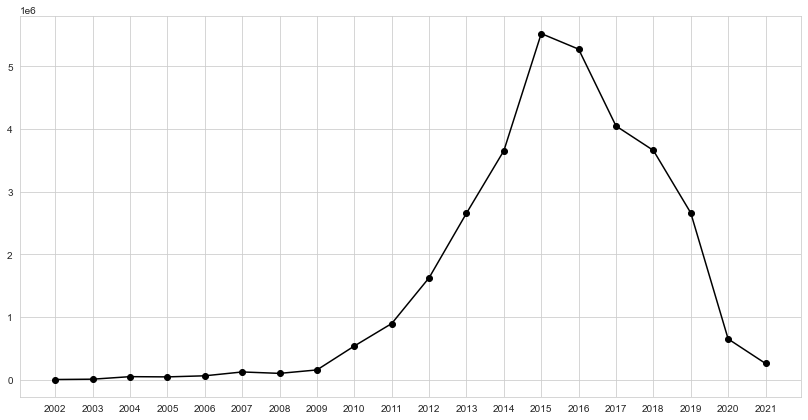

In [42]:
#Reviews by years

sns.set_style("whitegrid")
#== 
df4=df.groupby('year',as_index=False).agg({'review length':'sum'})
plt.figure(figsize=(14,7))
plt.plot(df4['year'].astype(str) ,df4['review length'],marker='o',label='review length by year',color='black');

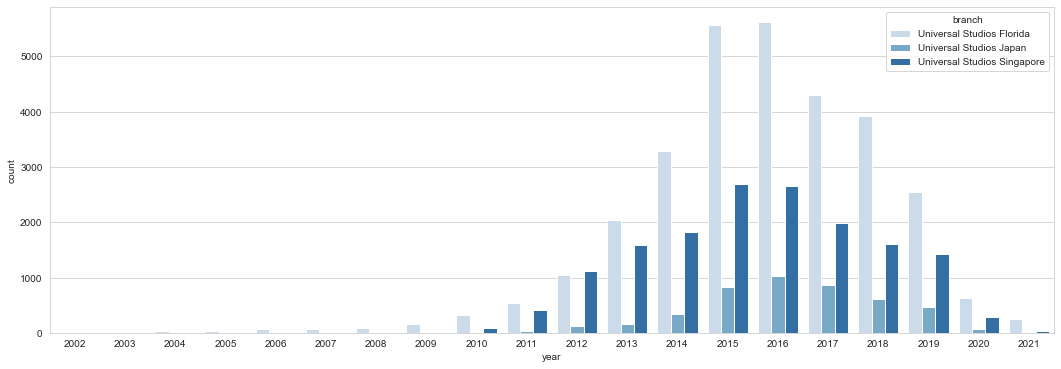

In [43]:
#branches per year

plt.figure(figsize=(18,6))
sns.countplot(data=df,x='year',hue='branch',palette='Blues');

In [44]:
#Review length

np.median(df['review length'].values)


405.0

In [45]:
np.median(df['wordcounts_reviewtext'].values)

76.0

In [9]:
#processed text review length
df['review_length_processed']=df['review_text'].apply(lambda x:len(x))
np.median(df['review_length_processed'].values)

254.0

In [6]:
np.median(df['wordcounts_reviewtext_processed'].values)

43.0

In [46]:
#check missing data

df.isnull().sum(axis=0)

reviewer                 0
rating                   0
written_date             0
title                    0
review_text              0
branch                   0
sentiment                0
date_object              0
year                     0
month                    0
weekday                  0
quarter                  0
review_og                0
review length            0
wordcounts_title         0
wordcounts_reviewtext    0
tokens                   0
Subjectivity             0
Polarity                 0
textblob_sentiment       0
dtype: int64

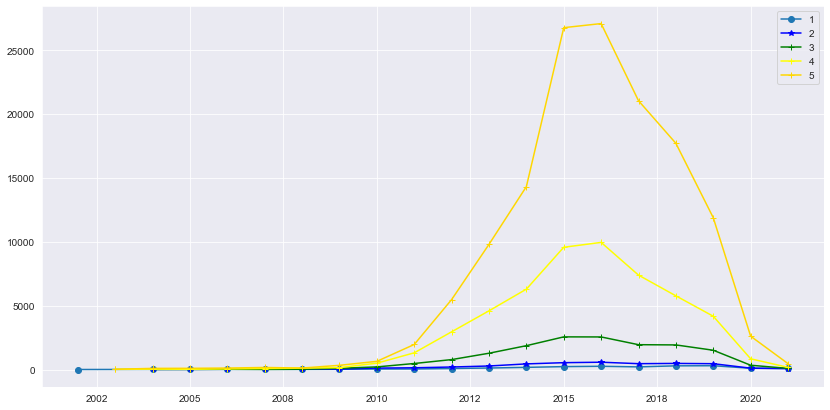

In [47]:
#rating by year

one = df.loc[df['rating']==1]
one=one.groupby('year',as_index=False).agg({'rating':'sum'})
#== 
two = df.loc[df['rating']==2]
two=two.groupby('year',as_index=False).agg({'rating':'sum'})

#== 
three = df.loc[df['rating']==3]
three=three.groupby('year',as_index=False).agg({'rating':'sum'})
#=== 
four = df.loc[df['rating']==4]
four=four.groupby('year',as_index=False).agg({'rating':'sum'})
#===
fifth = df.loc[df['rating']==5]
fifth=fifth.groupby('year',as_index=False).agg({'rating':'sum'})
#============== 
sns.set_style("darkgrid")
plt.figure(figsize=(14,7))
plt.plot(one['year'] ,one['rating'],marker='o',label='1') 
plt.plot(two['year'] , two['rating'],color='blue',marker='*',label='2')  
plt.plot(three['year'] ,three['rating'],color='green',marker='+',label='3') 
plt.plot(four['year'] ,four['rating'],color='yellow',marker='+',label='4') 
plt.plot(fifth['year'] ,fifth['rating'],color='gold',marker='+',label='5') 
from matplotlib.ticker import StrMethodFormatter
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}')) # No decimal places
plt.legend();

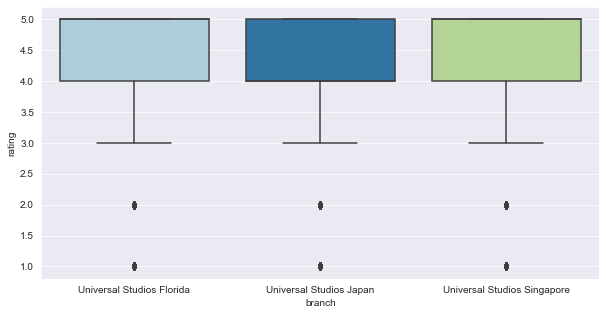

In [48]:
#rating by branch

plt.figure(figsize=(10,5))
sns.boxplot(x="branch", y="rating", data=df, palette='Paired');

[Text(0, 0, '2002'),
 Text(1, 0, '2003'),
 Text(2, 0, '2004'),
 Text(3, 0, '2005'),
 Text(4, 0, '2006'),
 Text(5, 0, '2007'),
 Text(6, 0, '2008'),
 Text(7, 0, '2009'),
 Text(8, 0, '2010'),
 Text(9, 0, '2011'),
 Text(10, 0, '2012'),
 Text(11, 0, '2013'),
 Text(12, 0, '2014'),
 Text(13, 0, '2015'),
 Text(14, 0, '2016'),
 Text(15, 0, '2017'),
 Text(16, 0, '2018'),
 Text(17, 0, '2019'),
 Text(18, 0, '2020'),
 Text(19, 0, '2021')]

<Figure size 720x432 with 0 Axes>

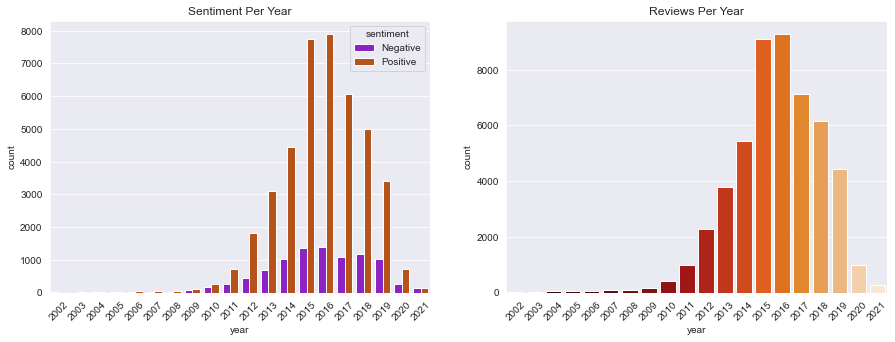

In [49]:
#Visualise data by years
plt.figure(figsize=(10,6))
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

sns.countplot(ax=axes[0],data=df,x='year',hue='sentiment',palette='gnuplot')
axes[0].set_title('Sentiment Per Year')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 45)

sns.countplot(ax=axes[1],data=df,x='year',palette='gist_heat')
axes[1].set_title('Reviews Per Year')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 45)

Text(0.5, 1.0, 'Reviews Per Quarter')

<Figure size 720x432 with 0 Axes>

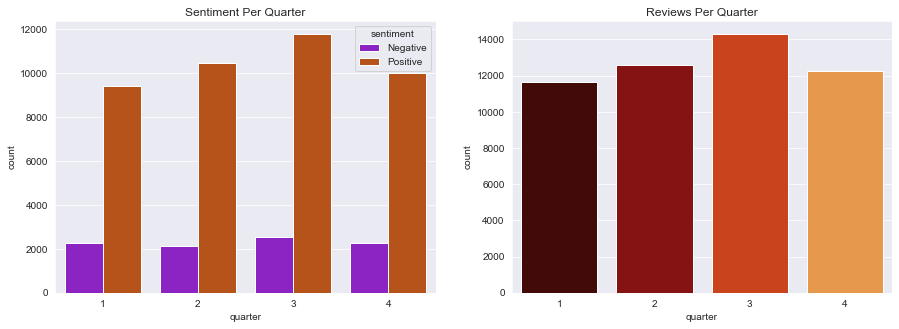

In [50]:
#Visualise data by quarters
plt.figure(figsize=(10,6))
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.countplot(ax=axes[0],data=df,x='quarter',hue='sentiment',palette='gnuplot')
axes[0].set_title('Sentiment Per Quarter')
sns.countplot(ax=axes[1],data=df,x='quarter',palette='gist_heat')
axes[1].set_title('Reviews Per Quarter')

[Text(0, 0, 'Jan'),
 Text(1, 0, 'Feb'),
 Text(2, 0, 'Mar'),
 Text(3, 0, 'Apr'),
 Text(4, 0, 'May'),
 Text(5, 0, 'Jun'),
 Text(6, 0, 'Jul'),
 Text(7, 0, 'Aug'),
 Text(8, 0, 'Sep'),
 Text(9, 0, 'Oct'),
 Text(10, 0, 'Nov'),
 Text(11, 0, 'Dec')]

<Figure size 720x432 with 0 Axes>

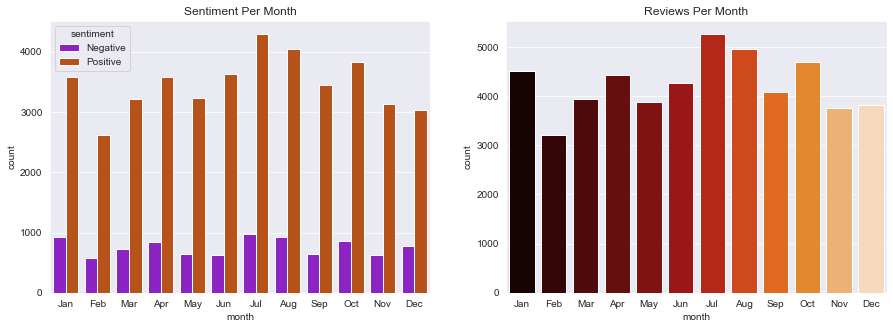

In [14]:
#Visualise data by months
plt.figure(figsize=(10,6))
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
sns.countplot(ax=axes[0],data=df,x='month',hue='sentiment',palette='gnuplot')
axes[0].set_title('Sentiment Per Month')
axes[0].set_xticklabels(['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
sns.countplot(ax=axes[1],data=df,x='month',palette='gist_heat')
axes[1].set_title('Reviews Per Month')
axes[1].set_xticklabels(['Jan', 'Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

<Figure size 720x432 with 0 Axes>

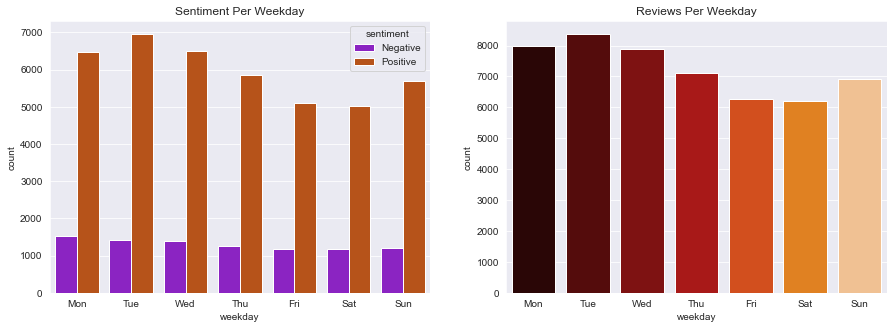

In [51]:
#Visualise data by weekdays
plt.figure(figsize=(10,6))
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

sns.countplot(ax=axes[0],data=df,x='weekday',hue='sentiment',palette='gnuplot')
axes[0].set_title('Sentiment Per Weekday')
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'])

sns.countplot(ax=axes[1],data=df,x='weekday',palette='gist_heat')
axes[1].set_title('Reviews Per Weekday')
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed','Thu','Fri','Sat','Sun'])

In [52]:
#branchers low rates

df5 = df.groupby(['branch'],as_index=False).agg({'rating':'mean'}).sort_values(by='rating', ascending=True).head(10)
df5.style.background_gradient(cmap="autumn", subset=['rating'])

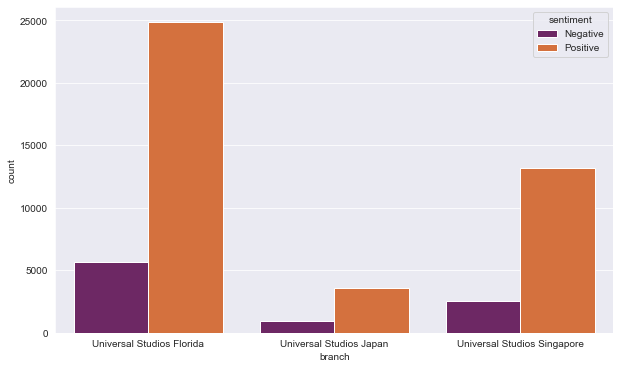

In [53]:
#sentiments branch

plt.figure(figsize=(10,6))
sns.countplot(data=df,x='branch',hue='sentiment',palette='inferno');

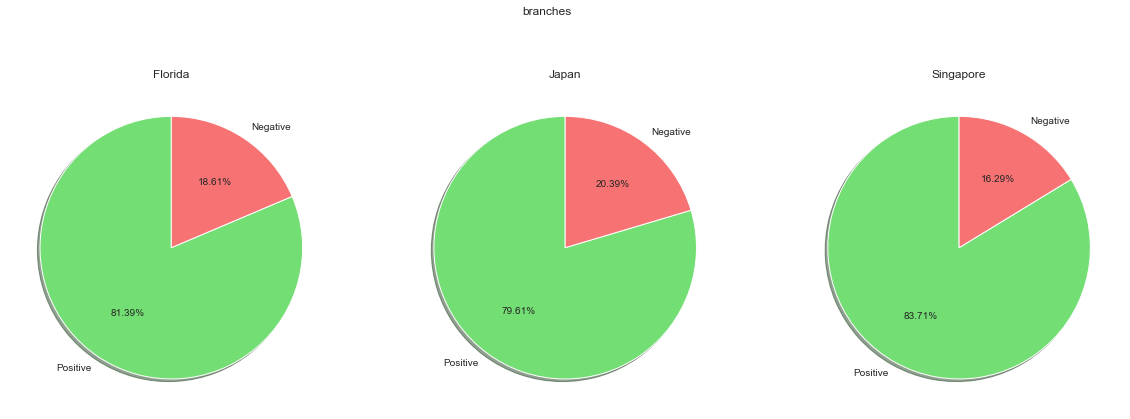

In [54]:
#sentiment percentage branch

df_cal=df.loc[df['branch']=='Universal Studios Florida']
df_par=df.loc[df['branch']=='Universal Studios Japan']
df_hon=df.loc[df['branch']=='Universal Studios Singapore']

#===== 
label_cal =df_cal['sentiment'].value_counts(sort = True).index
size_cal= df_cal['sentiment'].value_counts(sort = True) 
#=====
label_par =df_par['sentiment'].value_counts(sort = True).index
size_par= df_par['sentiment'].value_counts(sort = True) 
#==== 
label_hon =df_hon['sentiment'].value_counts(sort = True).index
size_hon= df_hon['sentiment'].value_counts(sort = True)
#===




fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=False)
fig.suptitle('branches')
axes[0].pie(size_cal,labels=label_cal,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#73de73','#f77272','#00BFFF']);
axes[0].set_title('Florida')
axes[1].pie(size_par,labels=label_par,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#73de73','#f77272','#00BFFF']);
axes[1].set_title('Japan');
axes[2].pie(size_hon,labels=label_hon,startangle=90,shadow=1,autopct='%1.2f%%',colors=['#73de73','#f77272','#00BFFF']);
axes[2].set_title('Singapore');

Sentiment Reviews

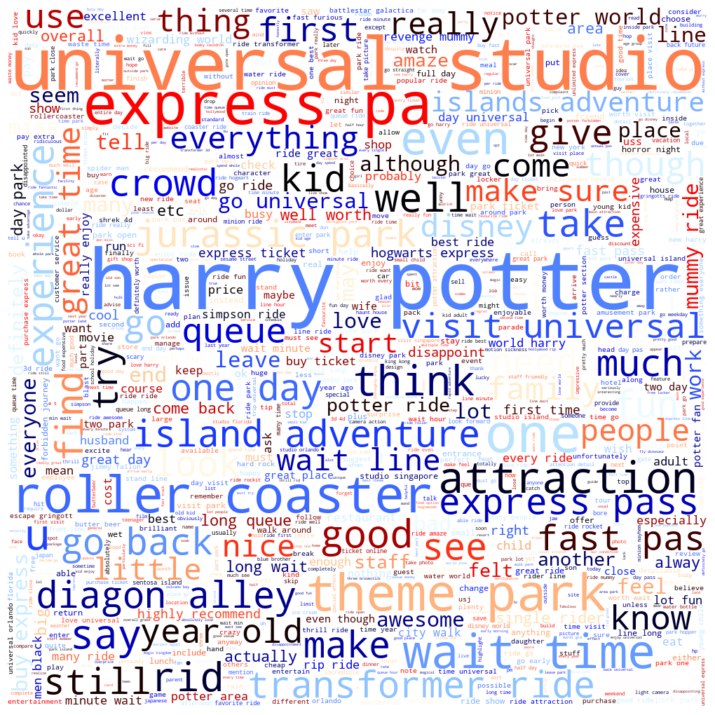

In [55]:
df['review_text']=df['review_text'].astype('str')
review_text = " ".join(txt for txt in df.review_text)

wc = WordCloud(background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='black',colormap='flag')
wc.generate(review_text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

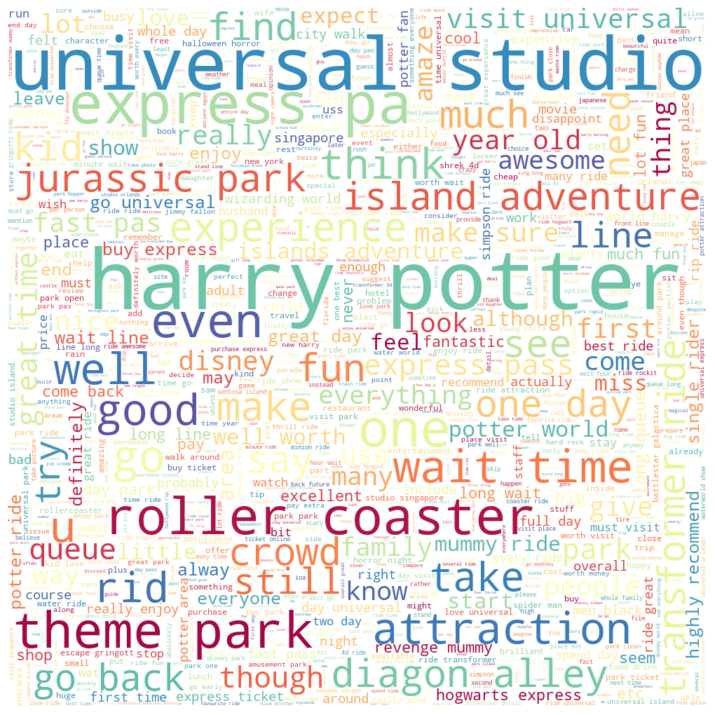

In [56]:
#positive

df_like=df.loc[df['sentiment']=='Positive']
#===
review_text = " ".join(insul for insul in df_like.review_text)

wc = WordCloud(background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='green',colormap='Spectral')
wc.generate(review_text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

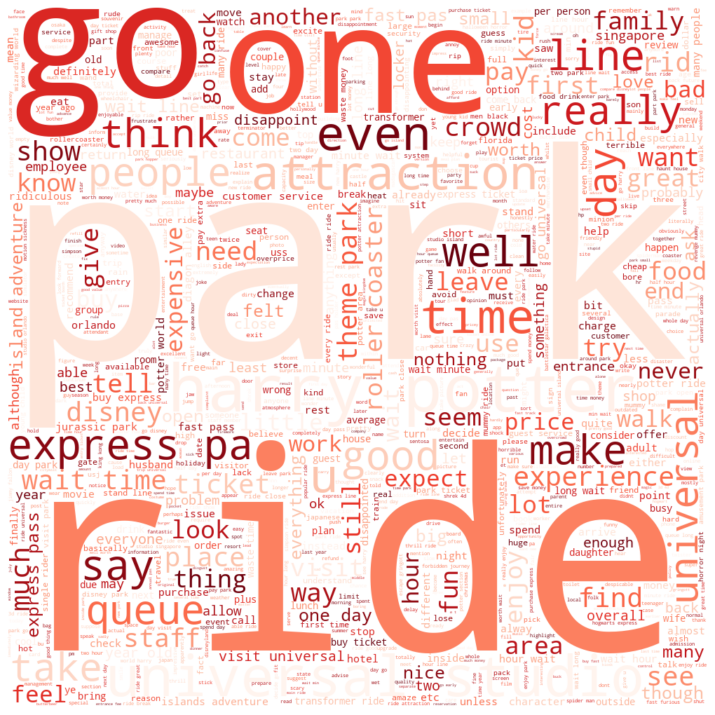

In [57]:
#negative

df_dislike=df.loc[df['sentiment']=='Negative']
#===
review_text = " ".join(insul for insul in df_dislike.review_text)


wc = WordCloud(background_color='white', mode='RGB',
               width=1000, max_words=1000, height=1000,
               random_state=1, contour_width=1, contour_color='red',colormap='Reds')
wc.generate(review_text)
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [58]:
#review words segmentation
#negative

df_dislike
review = df_dislike['review_text'].drop_duplicates()
all_sentences = []

for word in review:
    all_sentences.append(word)

all_sentences

lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)
#== 
import re

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)
#== 
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
#== 
import spacy
nlp = spacy.load('en_core_web_sm')
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#== 
df = pd.DataFrame(stem2)
df = df[0].value_counts()
#== 
df = df[:20,]
#== 
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
#====== 
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))
#======
nlp = spacy.load('en_core_web_sm') 
nlp.max_length = 2000000000000
#=====
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

In [59]:
df6['Entity'].value_counts()
negative= df6.groupby(['Entity']).size().to_frame('count').reset_index()
negative.sort_values(by='count', ascending=False)[:10]
fig = px.pie(negative, values='count', names='Entity')
fig.show()

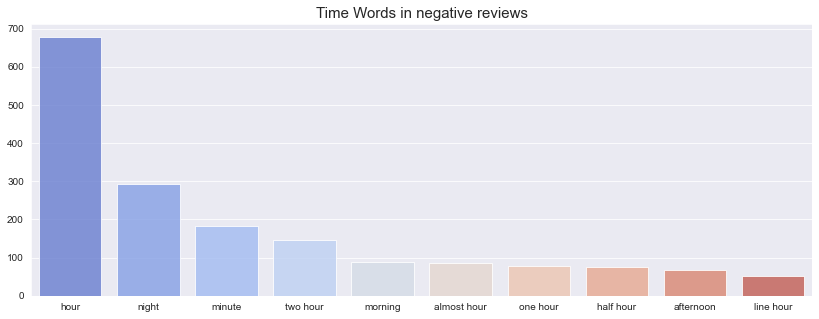

In [60]:
#time words

TIME = df6.query("Entity == 'TIME'")
TIME =TIME['Word'].value_counts()
TIME = TIME[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
TIME = sns.barplot(x=TIME.index,y= TIME.values, alpha=0.8,palette="coolwarm");
plt.title('Time Words in negative reviews',fontsize=15);
plt.show();

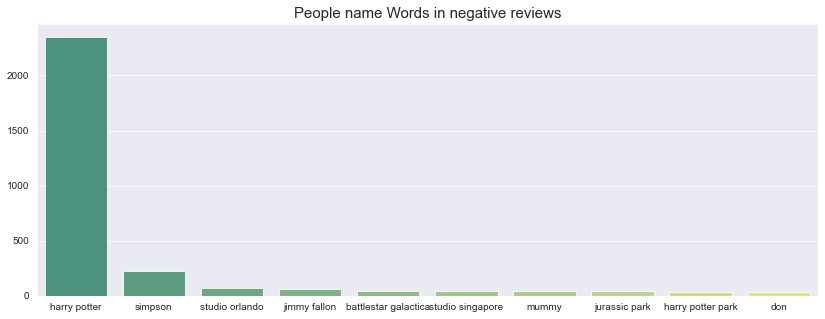

In [61]:
#name words

PERSON = df6.query("Entity == 'PERSON'")
PERSON =PERSON['Word'].value_counts()
PERSON = PERSON[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=PERSON.index,y= PERSON.values, alpha=0.8,palette="summer");
plt.title('People name Words in negative reviews',fontsize=15);
plt.show();

In [62]:
#harry potter reviews

df_copy['check']=df_copy['review_text'].apply(lambda word:word.count('harry potter'))
df_don=df_copy.loc[df_copy['check']>0]
print(df_don['review_og'].values[3:4])
print('\n')
print(df_don['review_og'].values[4:5])
print('\n')
print(df_don['review_og'].values[47:48])

['The park is always awesome. It vets pretty crowded in the Harry Potter areas but all of the rides, shows, attractions are "re-dunkously" fun. My teens are 16, 17 and 19 and they cant get enough of this place.']


['It was humid, it was windy, we had to wear masks, but Universal still didn’t disappoint. Here’s a little breakdown on what to expect:  May 18- This was a Tuesday, and we chose to go midweek due to better ticket prices and (we hoped) less of a crowd. Even in a pandemic, there are still many people who want to get out to experience some thrills, so the parks were busy. The Universal Studios park was our focus for the day, and we got there as soon as it opened. I recommend this: go as soon as it opens and immediately ride the most popular rides. There will be a shorter wait time. Gringotts was our first ride, and we only waited about 10-15 minutes. After 10:30, the parks tend to get busier and lines much longer. You do have to wear masks the entire time you are in line (even 

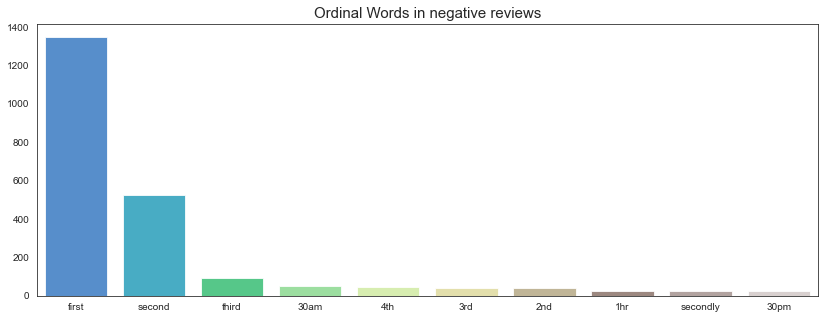

In [63]:
#ordinal words

ORDINAL = df6.query("Entity == 'ORDINAL'")        
ORDINAL =ORDINAL['Word'].value_counts()
ORDINAL = ORDINAL[:10]
sns.set_style("white")
plt.figure(figsize=(14,5));
PERSON = sns.barplot(x=ORDINAL.index,y= ORDINAL.values, alpha=0.8,palette="terrain");
plt.title('Ordinal Words in negative reviews',fontsize=15);
plt.show();

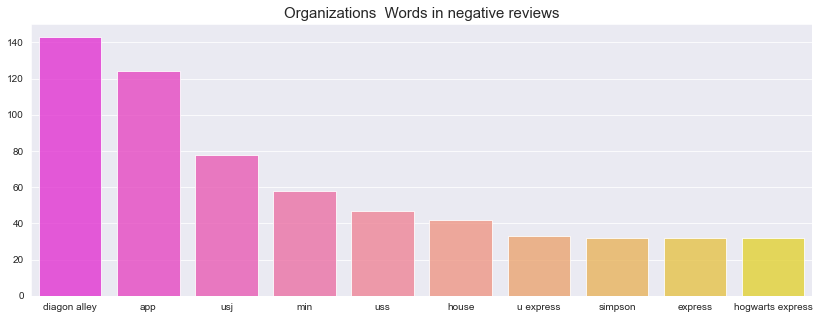

In [64]:
#organisation words

ORG = df6.query("Entity == 'ORG'")        
ORG =ORG['Word'].value_counts()
ORG = ORG[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
ORG = sns.barplot(x=ORG.index,y= ORG.values, alpha=0.8,palette="spring");
plt.title('Organizations  Words in negative reviews',fontsize=15);
plt.show();

In [65]:
#check diagon alley reviews

df_copy['check']=df_copy['review_text'].apply(lambda word:word.count('diagon alley'))
df_don=df_copy.loc[df_copy['check']>0]
print(df_don['review_og'].values[31:32])
print('\n')
print(df_don['review_og'].values[7:8])
print('\n')
print(df_don['review_og'].values[20:21])

['We traveled with three teens. The Harry Potter fans could have spent both days in Hogsmeade and Diagon Alley. It is detailed and true to the books. Hagrid’s ride was everyone’s favorite and limes were reasonable over the lunch hour. The child who is not a Potter fan rode roller coasters instead. However, there are not many real roller coasters at these two parks. Most of the rides are 3D simulations. One kid liked them but the rest of us got tired of it after a while. There is plenty to do and see for two days. Take ear plugs. The story set ups in the lines are loud, the sound effects on the rides are loud, even the roller coasters have speakers blasting music in the car (when did roller coasters start needing music to make it fun?). We left the park and ate at City Walk and that is loud, too. The light show at Hogwarts is fantastic']


['We had two amazing days at the park. Universal really treats families great especially with young children. The Harry Potter experience is very wel

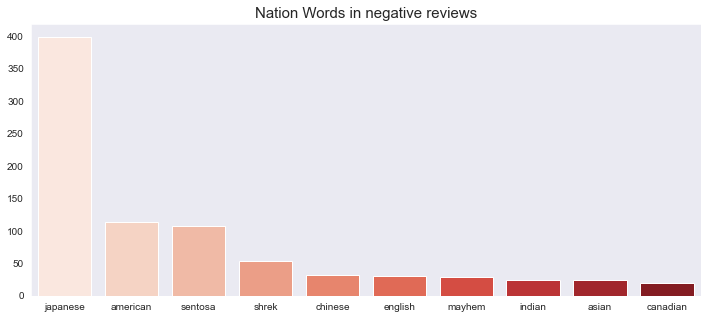

In [66]:
#nation words

NORP = df6.query("Entity == 'NORP'")        
NORP =NORP['Word'].value_counts()
NORP = NORP[:10]
sns.set_style("dark")
plt.figure(figsize=(12,5));
NORP = sns.barplot(x=NORP.index,y= NORP.values, alpha=1,palette="Reds");
plt.title('Nation Words in negative reviews',fontsize=15);
plt.show();

In [67]:
#check japanese negative reviews

df_copy['check']=df_copy['review_text'].apply(lambda word:word.count('japanese'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['sentiment']=='Negative']
print(df_don['review_og'].values[51:52])
print('\n')
print(df_don['review_og'].values[3:5])
print('\n')
print(df_don['review_og'].values[20:21])

['I went with high hopes as have thoroughly enjoyed the US parks however the biggest problem is that it’s all in Japanese with no English subtitles! It was really hard going to Terminator,Spider-Man, Jaws and Backdraft rides/experiences not knowing what on earth was going on! I thought they could have issued headphones to non English speakers but nothing!  We bought the Fast-pass for 4 rides which didn’t really work for us as we only needed one for Harry Potter and The Forbidden Journey and Spider-Man because the Terminator/Backdraft and Jaws rides had hardly any queues. We couldn’t be bothered to wait until the 6pm slot we had booked for the Minions as it seemed a bit childlike and was pouring with rain.  If you’re into thrill rides you need to buy the Fast-pass for the Flying Dinosaur, Flight of the Hippogriff, Hollywood Dream otherwise you are looking at wait times between 60-100 mins.  The highlight for me was Harry Potter world and seeing Hogwarts and Hogsmead being recreated, mag

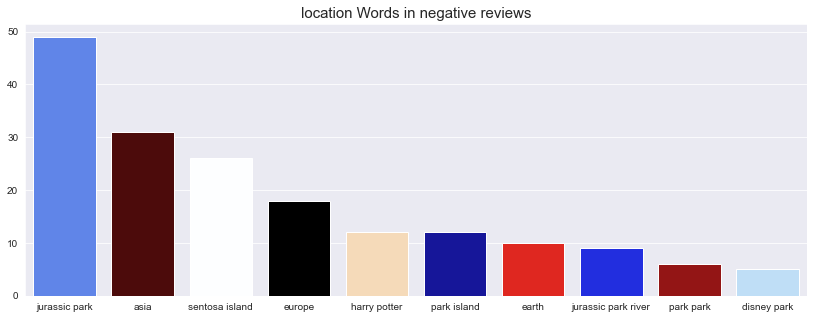

In [68]:
#location words

LOC = df6.query("Entity == 'LOC'")        
LOC =LOC['Word'].value_counts()
LOC = LOC[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(14,5));
NORP = sns.barplot(x=LOC.index,y= LOC.values, alpha=1,palette="flag");
plt.title('location Words in negative reviews',fontsize=15);
plt.show();

In [69]:
#check jurassic park in negative reviews

df_copy['check']=df_copy['review_text'].apply(lambda word:word.count('jurassic park'))
df_don=df_copy.loc[df_copy['check']>0]
df_don=df_don.loc[df_don['sentiment']=='Negative']
print(df_don['review_og'].values[1:2])
print('\n')
print(df_don['review_og'].values[5:6])
print('\n')
print(df_don['review_og'].values[6:7])

['We visited Universal in January. We purchased the hopper pass solely for the Harry Potter Hogwart Exress between the parks. In addition the one experience we wanted to see was Jurassic Park. First of all, Jurassic Park was closed for updating. We accepted this, but it wasn’t noted prior to purchasing our tickets. Next, the Hogwart Express was closed for planned maintenance, which is solely the only reason we purchased a hopper pass. There were other issues as well. The absolute inexcusable issue is that these items were sent to Universal in a letter in January. As of yet, we have not received a response to our concerns. Consumers deserve the respect of a response.']


["Arrived to Universal at approx 8:40am. Purchased tickets online in advance on arrival we had to wait in an extremely long line at will call to pick up tickets, Then again was directed to guest services to wait in an additional line to obtain a Disability Pass for my husband who suffers from severe PTSD from the Milita

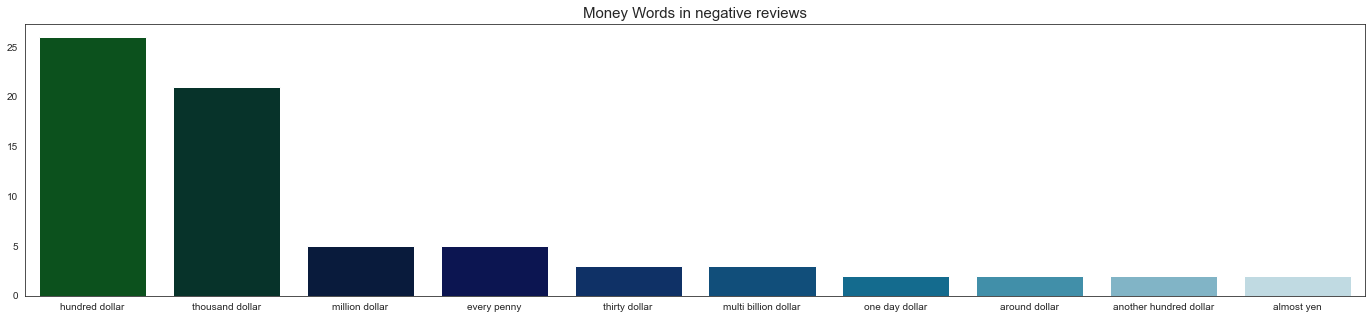

In [70]:
#money words

PRODUCT = df6.query("Entity == 'MONEY'")        
PRODUCT =PRODUCT['Word'].value_counts()
PRODUCT = PRODUCT[:10]
sns.set_style("white")
plt.figure(figsize=(24,5));
NORP = sns.barplot(x=PRODUCT.index,y= PRODUCT.values, alpha=1,palette="ocean");
plt.title('Money Words in negative reviews',fontsize=15);
plt.show();

## Modelling

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
from sklearn.metrics import f1_score, plot_confusion_matrix, confusion_matrix, accuracy_score, precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, classification_report
import pickle
import time
import re

In [64]:
dummy=pd.get_dummies(df3['sentiment'])

In [65]:
dfmodel=pd.concat((df3,dummy),axis=1)

In [66]:
dfmodel=dfmodel.drop(['Negative'], axis=1)

In [67]:
dfmodel.rename(columns={'Positive':'sentimentlabel'}, inplace = True)

In [69]:
dfmodel['sentimentlabel'].value_counts()

1    41621
0     9168
Name: sentimentlabel, dtype: int64

In [70]:
dfmodel.head()

reviewer  rating  written_date  \
0          Kelly B     2.0  May 30, 2021   
1              Jon     1.0  May 30, 2021   
2          Nerdy P     2.0  May 30, 2021   
3        ran101278     4.0  May 29, 2021   
4  tammies20132015     5.0  May 28, 2021   

                                               title  \
0  Universal is a complete Disaster - stick with ...   
1                               Food is hard to get.   
2                                       Disappointed   
3                                         My opinion   
4                  The Bourne Stuntacular...MUST SEE   

                                         review_text  \
0  we go universal memorial day weekend total tra...   
1  the food service horrible i review food it wai...   
2  i book vacation mainly ride hagrid motorcycle ...   
3  when person try test seat ride get green light...   
4  ok i stress enough anyone everyone go universa...   

                      branch sentiment date_object  year  month  ...  \
0  Universal Studios Florida  Negative  2021-05-30  2021      5  ...   
1  Universal Studios Florida  Negative  2021-05-30  2021      5  ...   
2  Universal Studios Florida  Negative  2021-05-30  2021      5  ...   
3  Universal Studios Florida  Positive  2021-05-29  2021      5  ...   
4  Universal Studios Florida  Positive  2021-05-28  2021      5  ...   

                                           review_og  review length  \
0  We went to Universal over Memorial Day weekend...           1354   
1  The food service is horrible. I’m not reviewin...            201   
2  I booked this vacation mainly to ride Hagrid m...           1274   
3  When a person tries the test seat for the ride...            286   
4  Ok, I can't stress enough to anyone and everyo...            502   

  wordcounts_title  wordcounts_reviewtext  \
0                9                    255   
1                5                     35   
2                1                    228   
3                2                     55   
4                4                     94   

                                              tokens  \
0  [we, went, universal, memorial, day, weekend, ...   
1  [the, food, service, horrible, i, reviewing, f...   
2  [i, booked, vacation, mainly, ride, hagrid, mo...   
3  [when, person, tries, test, seat, rides, gets,...   
4  [ok, i, stress, enough, anyone, everyone, go, ...   

   wordcounts_reviewtext_processed Subjectivity  Polarity  textblob_sentiment  \
0                              149     0.395556 -0.063333            Negative   
1                               23     0.700000 -0.400000            Negative   
2                              129     0.520963 -0.039130            Negative   
3                               27     0.375000  0.037500            Positive   
4                               56     0.546717  0.245455            Positive   

   sentimentlabel  
0               0  
1               0  
2               0  
3               1  
4               1  

[5 rows x 22 columns]

In [71]:
#export dfmodel as csv
dfmodel.to_csv('dfmodel.csv')

In [3]:
#import dfmodel csv if skipping previous steps
#dfmodel = pd.read_csv('dfmodel.csv')

In [3]:
dfmodel.shape

(50789, 23)

In [84]:
dfmodel.review_text

0        we go universal memorial day weekend total tra...
1        the food service horrible i review food it wai...
2        i book vacation mainly ride hagrid motorcycle ...
3        when person try test seat ride get green light...
4        ok i stress enough anyone everyone go universa...
                               ...                        
50899    this first visit universal studio theme park i...
50900    we finally visit singapore first theme park un...
50901    we visit first week soft opening unfortunately...
50902    we visit 3rd day soft open ticket sale limit l...
50903    my group manage get ticket february sneak prev...
Name: review_text, Length: 50789, dtype: object

In [72]:
#evaluating textblob sentiment analysis accuracy
textblob_sentiment = pd.get_dummies(dfmodel['textblob_sentiment'])

In [73]:
textblob_sentiment

Negative  Positive
0             1         0
1             1         0
2             1         0
3             0         1
4             0         1
...         ...       ...
50899         0         1
50900         0         1
50901         0         1
50902         0         1
50903         0         1

[50789 rows x 2 columns]

In [212]:
print('Accuracy: {}'.format(accuracy_score(dfmodel['sentimentlabel'], textblob_sentiment['Positive'])))
print("Precision:{}".format(precision_score(dfmodel['sentimentlabel'], textblob_sentiment['Positive'])))
print("Recall:{}".format(recall_score(dfmodel['sentimentlabel'], textblob_sentiment['Positive'])))
print('F1 score: {}'.format(f1_score(dfmodel['sentimentlabel'], textblob_sentiment['Positive'])))
print('MSE: {}'.format(mean_squared_error(dfmodel['sentimentlabel'], textblob_sentiment['Positive'])))
print('R2 score: {}'.format(r2_score(dfmodel['sentimentlabel'], textblob_sentiment['Positive'])))
print('ROC AUC score: {}'.format(roc_auc_score(dfmodel['sentimentlabel'], textblob_sentiment['Positive'])))
print('\nClassification Report:\n {}'.format(classification_report(dfmodel['sentimentlabel'], textblob_sentiment['Positive'])))
print('Confusion matrix:')
confusion_matrix(dfmodel['sentimentlabel'], textblob_sentiment['Positive'])

Accuracy: 0.8285455512020319
Precision:0.8519579955942426
Recall:0.9570889695105836
F1 score: 0.9014686913032656
MSE: 0.17145444879796806
R2 score: -0.15904678648217274
ROC AUC score: 0.6010357587518014

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.24      0.34      9168
           1       0.85      0.96      0.90     41621

    accuracy                           0.83     50789
   macro avg       0.70      0.60      0.62     50789
weighted avg       0.80      0.83      0.80     50789

Confusion matrix:


array([[ 2246,  6922],
       [ 1786, 39835]])

In [5]:
num_features = 750 #750 appears to be optimal
vect = CountVectorizer(max_features=num_features)

In [6]:
#split into train and test set
train, test = train_test_split(dfmodel, test_size=0.25, random_state=123, shuffle=True)

In [7]:
train.shape

(38091, 23)

In [8]:
test.shape

(12698, 23)

In [9]:
X_train = train.review_text
y_train = train.sentimentlabel

In [10]:
X_test = test.review_text
y_test = test.sentimentlabel

In [11]:
X_train_dtm = vect.fit_transform(X_train)

In [12]:
X_train_dtm

<38091x750 sparse matrix of type '<class 'numpy.int64'>'
	with 1472292 stored elements in Compressed Sparse Row format>

In [13]:
X_test_dtm=vect.transform(X_test)

In [14]:
X_test_dtm

<12698x750 sparse matrix of type '<class 'numpy.int64'>'
	with 490975 stored elements in Compressed Sparse Row format>

In [197]:
#logregression
from sklearn import *
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_dtm, y_train)
y_test_pred_log = logreg.predict(X_test_dtm)

Accuracy Score:  0.8813198928965191


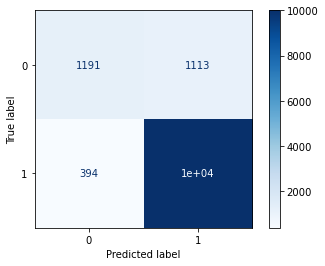

In [199]:
plot_confusion_matrix(logreg,X_test_dtm, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_test_pred_log)
print('Accuracy Score: ',accuracy)

In [211]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_pred_log)))
print("Precision:{}".format(precision_score(y_test, y_test_pred_log)))
print("Recall:{}".format(recall_score(y_test, y_test_pred_log)))
print('F1 score: {}'.format(f1_score(y_test, y_test_pred_log)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_pred_log)))
print('R2 score: {}'.format(r2_score(y_test, y_test_pred_log)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_test_pred_log)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_test_pred_log)))
print('Confusion matrix:')
confusion_matrix(y_test, y_test_pred_log)

Accuracy: 0.8813198928965191
Precision:0.8998470260055791
Recall:0.9620935154897056
F1 score: 0.9299297903008322
MSE: 0.11868010710348087
R2 score: 0.20093264610459027
ROC AUC score: 0.7395102994115194

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.52      0.61      2304
           1       0.90      0.96      0.93     10394

    accuracy                           0.88     12698
   macro avg       0.83      0.74      0.77     12698
weighted avg       0.87      0.88      0.87     12698

Confusion matrix:


array([[ 1191,  1113],
       [  394, 10000]])

Accuracy Score:  0.8421798708458025


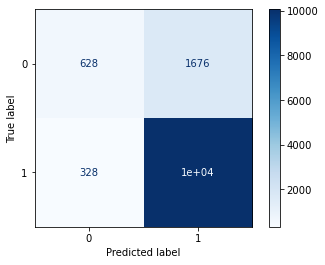

In [250]:
#try vectorising with n-grams
#2-grams
num_features = 750 
vect2 = CountVectorizer(max_features=num_features, ngram_range = (2, 2))
X_train_2gram = vect2.fit_transform(X_train)
X_test_2gram = vect2.transform(X_test)

#logregression
from sklearn import *
from sklearn.linear_model import LogisticRegression

logreg2 = LogisticRegression(max_iter=1000)
logreg2.fit(X_train_2gram, y_train)
y_test_2gram_log = logreg2.predict(X_test_2gram)

plot_confusion_matrix(logreg2,X_test_2gram, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_test_2gram_log)
print('Accuracy Score: ',accuracy)

In [252]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_2gram_log)))
print("Precision:{}".format(precision_score(y_test, y_test_2gram_log)))
print("Recall:{}".format(recall_score(y_test, y_test_2gram_log)))
print('F1 score: {}'.format(f1_score(y_test, y_test_2gram_log)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_2gram_log)))
print('R2 score: {}'.format(r2_score(y_test, y_test_2gram_log)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_test_2gram_log)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_test_2gram_log)))
print('Confusion matrix:')
confusion_matrix(y_test, y_test_2gram_log)

Accuracy: 0.8421798708458025
Precision:0.8572645205246125
Recall:0.9684433326919376
F1 score: 0.90946873870618
MSE: 0.15782012915419752
R2 score: -0.06259520717080358
ROC AUC score: 0.620506388568191

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.27      0.39      2304
           1       0.86      0.97      0.91     10394

    accuracy                           0.84     12698
   macro avg       0.76      0.62      0.65     12698
weighted avg       0.82      0.84      0.81     12698

Confusion matrix:


array([[  628,  1676],
       [  328, 10066]])

Accuracy Score:  0.8233580091352969


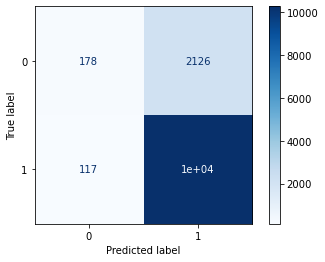

In [251]:
#try vectorising with n-grams
#3-grams
num_features = 750
vect3 = CountVectorizer(max_features=num_features, ngram_range = (3, 3))
X_train_3gram = vect3.fit_transform(X_train)
X_test_3gram = vect3.transform(X_test)

#logregression
from sklearn import *
from sklearn.linear_model import LogisticRegression

logreg3 = LogisticRegression(max_iter=1000)
logreg3.fit(X_train_3gram, y_train)
y_test_3gram_log = logreg3.predict(X_test_3gram)

plot_confusion_matrix(logreg3,X_test_3gram, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_test_3gram_log)
print('Accuracy Score: ',accuracy)

In [253]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_3gram_log)))
print("Precision:{}".format(precision_score(y_test, y_test_3gram_log)))
print("Recall:{}".format(recall_score(y_test, y_test_3gram_log)))
print('F1 score: {}'.format(f1_score(y_test, y_test_3gram_log)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_3gram_log)))
print('R2 score: {}'.format(r2_score(y_test, y_test_3gram_log)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_test_3gram_log)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_test_3gram_log)))
print('Confusion matrix:')
confusion_matrix(y_test, y_test_3gram_log)

Accuracy: 0.8233580091352969
Precision:0.8285898572925905
Recall:0.9887435058687705
F1 score: 0.9016098609466157
MSE: 0.1766419908647031
R2 score: -0.18932188107989645
ROC AUC score: 0.5330002251566074

Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.08      0.14      2304
           1       0.83      0.99      0.90     10394

    accuracy                           0.82     12698
   macro avg       0.72      0.53      0.52     12698
weighted avg       0.79      0.82      0.76     12698

Confusion matrix:


array([[  178,  2126],
       [  117, 10277]])

In [206]:
#SVM

from sklearn.svm import LinearSVC
svm_linear = LinearSVC(dual=False)

In [207]:
svm_linear.fit(X_train_dtm, y_train)
y_test_pred_svm = svm_linear.predict(X_test_dtm)

Accuracy Score:  0.8801386045046464


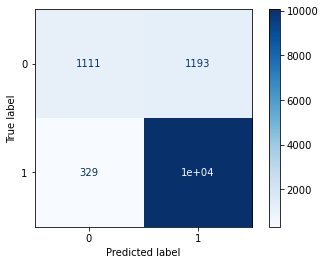

In [208]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(svm_linear,X_test_dtm, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_test_pred_svm)
print('Accuracy Score: ',accuracy)

In [210]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_pred_svm)))
print("Precision:{}".format(precision_score(y_test, y_test_pred_svm)))
print("Recall:{}".format(recall_score(y_test, y_test_pred_svm)))
print('F1 score: {}'.format(f1_score(y_test, y_test_pred_svm)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_pred_svm)))
print('R2 score: {}'.format(r2_score(y_test, y_test_pred_svm)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_test_pred_svm)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_test_pred_svm)))
print('Confusion matrix:')
confusion_matrix(y_test, y_test_pred_svm)

Accuracy: 0.8801386045046464
Precision:0.8940309113519275
Recall:0.9683471233403886
F1 score: 0.9297062627009052
MSE: 0.1198613954953536
R2 score: 0.1929790891646891
ROC AUC score: 0.7252759922257499

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.48      0.59      2304
           1       0.89      0.97      0.93     10394

    accuracy                           0.88     12698
   macro avg       0.83      0.73      0.76     12698
weighted avg       0.87      0.88      0.87     12698

Confusion matrix:


array([[ 1111,  1193],
       [  329, 10065]])

/Users/jacquelinelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy Score:  0.8492676011970389


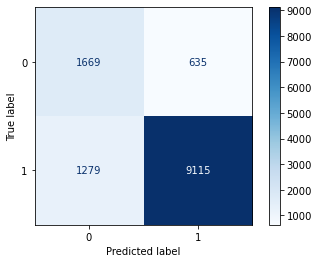

In [29]:
#Try penalized SVM (this is good for imbalanced datasets)
#took about an hour to run
from sklearn.svm import SVC

#add class_weight='balanced' to add penalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train_dtm, y_train)

svc_predict = svc_model.predict(X_test_dtm)

plot_confusion_matrix(svc_model,X_test_dtm, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, svc_predict)
print('Accuracy Score: ',accuracy)

In [30]:
print('Accuracy: {}'.format(accuracy_score(y_test, svc_predict)))
print("Precision:{}".format(precision_score(y_test, svc_predict)))
print("Recall:{}".format(recall_score(y_test, svc_predict)))
print('F1 score: {}'.format(f1_score(y_test, svc_predict)))
print('MSE: {}'.format(mean_squared_error(y_test, svc_predict)))
print('R2 score: {}'.format(r2_score(y_test, svc_predict)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, svc_predict)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, svc_predict)))
print('Confusion matrix:')
confusion_matrix(y_test, svc_predict)

Accuracy: 0.8492676011970389
Precision:0.9348717948717948
Recall:0.8769482393688667
F1 score: 0.9049841143764893
MSE: 0.1507323988029611
R2 score: -0.014873865531396246
ROC AUC score: 0.800670300239989

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.72      0.64      2304
           1       0.93      0.88      0.90     10394

    accuracy                           0.85     12698
   macro avg       0.75      0.80      0.77     12698
weighted avg       0.87      0.85      0.86     12698

Confusion matrix:


array([[1669,  635],
       [1279, 9115]])

In [213]:
#NB

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [214]:
nb.fit(X_train_dtm, y_train)
y_test_pred_nb = nb.predict(X_test_dtm)

Accuracy Score:  0.8576941250590644


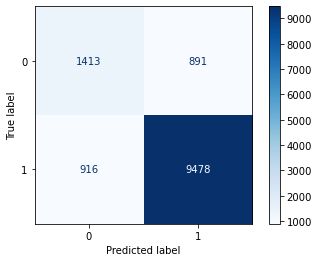

In [215]:
plot_confusion_matrix(nb,X_test_dtm, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_test_pred_nb)
print('Accuracy Score: ',accuracy)

In [216]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_pred_nb)))
print("Precision:{}".format(precision_score(y_test, y_test_pred_nb)))
print("Recall:{}".format(recall_score(y_test, y_test_pred_nb)))
print('F1 score: {}'.format(f1_score(y_test, y_test_pred_nb)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_pred_nb)))
print('R2 score: {}'.format(r2_score(y_test, y_test_pred_nb)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_test_pred_nb)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_test_pred_nb)))
print('Confusion matrix:')
confusion_matrix(y_test, y_test_pred_nb)

Accuracy: 0.8576941250590644
Precision:0.9140707879255473
Recall:0.9118722339811429
F1 score: 0.912970187352502
MSE: 0.14230587494093558
R2 score: 0.04186150730656579
ROC AUC score: 0.7625767419905715

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61      2304
           1       0.91      0.91      0.91     10394

    accuracy                           0.86     12698
   macro avg       0.76      0.76      0.76     12698
weighted avg       0.86      0.86      0.86     12698

Confusion matrix:


array([[1413,  891],
       [ 916, 9478]])

In [217]:
#randomforest

from sklearn.ensemble import RandomForestClassifier

In [218]:
#determine ideal n_estimators
#if you are re-running this code, change to estimator_range = range(1, 40, 5)
train_scores = []
test_scores = []

rf = RandomForestClassifier(random_state=42)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train_dtm, y_train)
    train_scores.append(rf.score(X_train_dtm, y_train))
    test_scores.append(rf.score(X_test_dtm, y_test))

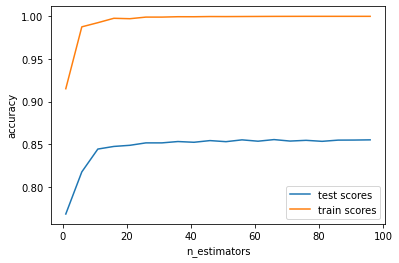

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(estimator_range, test_scores, label="test scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [220]:
#ideal is 20
rf = RandomForestClassifier(n_estimators = 20, random_state = 42)

In [221]:
model = rf.fit(X_train_dtm, y_train)
y_test_pred_rf = rf.predict(X_test_dtm)

Accuracy Score:  0.8508426523862026


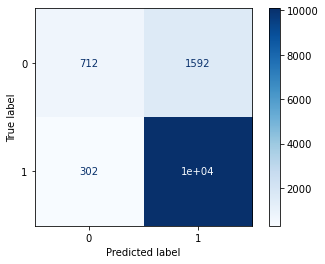

In [222]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(rf,X_test_dtm, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_test_pred_rf)
print('Accuracy Score: ',accuracy)

In [223]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_pred_rf)))
print("Precision:{}".format(precision_score(y_test, y_test_pred_rf)))
print("Recall:{}".format(recall_score(y_test, y_test_pred_rf)))
print('F1 score: {}'.format(f1_score(y_test, y_test_pred_rf)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_pred_rf)))
print('R2 score: {}'.format(r2_score(y_test, y_test_pred_rf)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_test_pred_rf)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_test_pred_rf)))
print('Confusion matrix:')
confusion_matrix(y_test, y_test_pred_rf)

Accuracy: 0.8508426523862026
Precision:0.8637452927079767
Recall:0.9709447758322108
F1 score: 0.9142132439532566
MSE: 0.14915734761379745
R2 score: -0.004269122944861259
ROC AUC score: 0.6399862768049943

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.31      0.43      2304
           1       0.86      0.97      0.91     10394

    accuracy                           0.85     12698
   macro avg       0.78      0.64      0.67     12698
weighted avg       0.83      0.85      0.83     12698

Confusion matrix:


array([[  712,  1592],
       [  302, 10092]])

In [224]:
#using AdaBoost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train_dtm, y_train)
y_test_pred_ada = ada.predict(X_test_dtm)
print('AdaBoost accuracy: ',accuracy_score(y_test, y_test_pred_ada))

AdaBoost accuracy:  0.8701370294534573


Accuracy Score:  0.8701370294534573


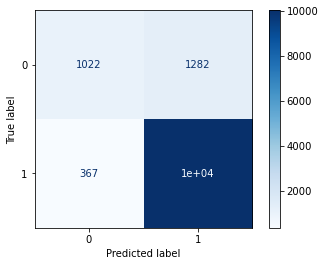

In [225]:
plot_confusion_matrix(ada,X_test_dtm, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_test_pred_ada)
print('Accuracy Score: ',accuracy)

In [226]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_pred_ada)))
print("Precision:{}".format(precision_score(y_test, y_test_pred_ada)))
print("Recall:{}".format(recall_score(y_test, y_test_pred_ada)))
print('F1 score: {}'.format(f1_score(y_test, y_test_pred_ada)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_pred_ada)))
print('R2 score: {}'.format(r2_score(y_test, y_test_pred_ada)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_test_pred_ada)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_test_pred_ada)))
print('Confusion matrix:')
confusion_matrix(y_test, y_test_pred_ada)

Accuracy: 0.8701370294534573
Precision:0.8866389601202582
Recall:0.9646911679815278
F1 score: 0.9240197207759295
MSE: 0.12986297054654275
R2 score: 0.12563897374019206
ROC AUC score: 0.7041337784352083

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.44      0.55      2304
           1       0.89      0.96      0.92     10394

    accuracy                           0.87     12698
   macro avg       0.81      0.70      0.74     12698
weighted avg       0.86      0.87      0.86     12698

Confusion matrix:


array([[ 1022,  1282],
       [  367, 10027]])

In [227]:
#try imbalanced-learn (for imbalanced datasets)
#!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 3.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 11.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [24]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier


RandomOverSampler will increase the data samples in the minority class (negative). It makes the minority class have the same data samples as the majority class (positive). The function synthesizes new dummy data samples in the minority class to enable class balancing.

In [231]:
Counter(y_train)

Counter({1: 31227, 0: 6864})

In [240]:
#oversampling (minority class match majority)
ROS = RandomOverSampler(sampling_strategy=1)
X_train_ros, y_train_ros = ROS.fit_resample(X_train_dtm, y_train)

In [241]:
Counter(y_train_ros)

Counter({1: 31227, 0: 31227})

In [20]:
#undersampling (majority class match minority)
RUS = RandomUnderSampler(sampling_strategy=1)
X_train_rus, y_train_rus = RUS.fit_resample(X_train_dtm, y_train)

In [21]:
Counter(y_train_rus)

Counter({0: 6864, 1: 6864})

Accuracy Score:  0.833359584186486


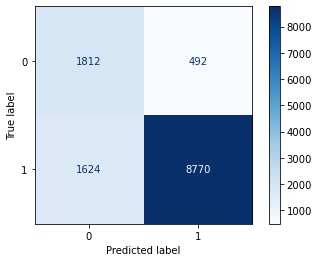

In [243]:
#try again with logreg after balancing dataset with oversampler
from sklearn import *
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_ros, y_train_ros)
y_pred_log_im = logreg.predict(X_test_dtm)
plot_confusion_matrix(logreg,X_test_dtm, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_pred_log_im)
print('Accuracy Score: ',accuracy)

In [244]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_log_im)))
print("Precision:{}".format(precision_score(y_test, y_pred_log_im)))
print("Recall:{}".format(recall_score(y_test, y_pred_log_im)))
print('F1 score: {}'.format(f1_score(y_test, y_pred_log_im)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred_log_im)))
print('R2 score: {}'.format(r2_score(y_test, y_pred_log_im)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_pred_log_im)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_pred_log_im)))
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_log_im)

Accuracy: 0.833359584186486
Precision:0.9468797236018138
Recall:0.8437560130844718
F1 score: 0.8923483923483922
MSE: 0.16664041581351394
R2 score: -0.12198176565539942
ROC AUC score: 0.8151071732089026

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.79      0.63      2304
           1       0.95      0.84      0.89     10394

    accuracy                           0.83     12698
   macro avg       0.74      0.82      0.76     12698
weighted avg       0.87      0.83      0.84     12698

Confusion matrix:


array([[1812,  492],
       [1624, 8770]])

/Users/jacquelinelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy Score:  0.8205229169948023


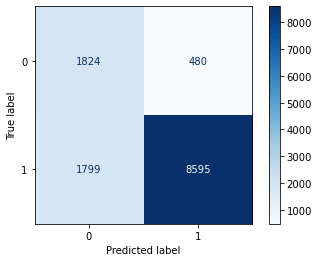

In [22]:
#try again with logreg after balancing dataset with undersampler
from sklearn import *
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_rus, y_train_rus)
y_pred_log_rus = logreg.predict(X_test_dtm)
plot_confusion_matrix(logreg,X_test_dtm, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_pred_log_rus)
print('Accuracy Score: ',accuracy)

In [23]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred_log_rus)))
print("Precision:{}".format(precision_score(y_test, y_pred_log_rus)))
print("Recall:{}".format(recall_score(y_test, y_pred_log_rus)))
print('F1 score: {}'.format(f1_score(y_test, y_pred_log_rus)))
print('MSE: {}'.format(mean_squared_error(y_test, y_pred_log_rus)))
print('R2 score: {}'.format(r2_score(y_test, y_pred_log_rus)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_pred_log_rus)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_pred_log_rus)))
print('Confusion matrix:')
confusion_matrix(y_test, y_pred_log_rus)

Accuracy: 0.8205229169948023
Precision:0.947107438016529
Recall:0.826919376563402
F1 score: 0.8829421131028815
MSE: 0.17947708300519766
R2 score: -0.20841041773565938
ROC AUC score: 0.8092930216150342

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.79      0.62      2304
           1       0.95      0.83      0.88     10394

    accuracy                           0.82     12698
   macro avg       0.73      0.81      0.75     12698
weighted avg       0.87      0.82      0.83     12698

Confusion matrix:


array([[1824,  480],
       [1799, 8595]])

In [33]:
brf = BalancedRandomForestClassifier(random_state=42)
brf.fit(X_train_dtm,y_train)
y_predict_brf = brf.predict(X_test_dtm)

In [34]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict_brf)))
print("Precision:{}".format(precision_score(y_test, y_predict_brf)))
print("Recall:{}".format(recall_score(y_test, y_predict_brf)))
print('F1 score: {}'.format(f1_score(y_test, y_predict_brf)))
print('MSE: {}'.format(mean_squared_error(y_test, y_predict_brf)))
print('R2 score: {}'.format(r2_score(y_test, y_predict_brf)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_predict_brf)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_predict_brf)))
print('Confusion matrix:')
confusion_matrix(y_test, y_predict_brf)

Accuracy: 0.7613009922822491
Precision:0.9491277296571916
Recall:0.7485087550509909
F1 score: 0.8369641224248292
MSE: 0.23869900771775082
R2 score: -0.6071487389893742
ROC AUC score: 0.7837595858588288

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.82      0.55      2304
           1       0.95      0.75      0.84     10394

    accuracy                           0.76     12698
   macro avg       0.68      0.78      0.70     12698
weighted avg       0.85      0.76      0.79     12698

Confusion matrix:


array([[1887,  417],
       [2614, 7780]])

In [35]:
rusb = RUSBoostClassifier(random_state=42)
rusb.fit(X_train_dtm,y_train)
y_predict_rusb = rusb.predict(X_test_dtm)

In [36]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict_rusb)))
print("Precision:{}".format(precision_score(y_test, y_predict_rusb)))
print("Recall:{}".format(recall_score(y_test, y_predict_rusb)))
print('F1 score: {}'.format(f1_score(y_test, y_predict_rusb)))
print('MSE: {}'.format(mean_squared_error(y_test, y_predict_rusb)))
print('R2 score: {}'.format(r2_score(y_test, y_predict_rusb)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_predict_rusb)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_predict_rusb)))
print('Confusion matrix:')
confusion_matrix(y_test, y_predict_rusb)

Accuracy: 0.7768152464955111
Precision:0.9377026401111626
Recall:0.7791033288435636
F1 score: 0.851077246452969
MSE: 0.2231847535044889
R2 score: -0.5026920245120048
ROC AUC score: 0.7727981921995596

Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.77      0.55      2304
           1       0.94      0.78      0.85     10394

    accuracy                           0.78     12698
   macro avg       0.69      0.77      0.70     12698
weighted avg       0.85      0.78      0.80     12698

Confusion matrix:


array([[1766,  538],
       [2296, 8098]])

In [37]:
eec = EasyEnsembleClassifier(random_state=42)
eec.fit(X_train_dtm,y_train)
y_predict_eec = eec.predict(X_test_dtm)

In [38]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict_eec)))
print("Precision:{}".format(precision_score(y_test, y_predict_eec)))
print("Recall:{}".format(recall_score(y_test, y_predict_eec)))
print('F1 score: {}'.format(f1_score(y_test, y_predict_eec)))
print('MSE: {}'.format(mean_squared_error(y_test, y_predict_eec)))
print('R2 score: {}'.format(r2_score(y_test, y_predict_eec)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_predict_eec)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_predict_eec)))
print('Confusion matrix:')
confusion_matrix(y_test, y_predict_eec)

Accuracy: 0.802252323200504
Precision:0.941921740105393
Recall:0.8082547623629017
F1 score: 0.8699839486356341
MSE: 0.19774767679949598
R2 score: -0.3314254317394649
ROC AUC score: 0.7917141867370064

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.78      0.59      2304
           1       0.94      0.81      0.87     10394

    accuracy                           0.80     12698
   macro avg       0.71      0.79      0.73     12698
weighted avg       0.86      0.80      0.82     12698

Confusion matrix:


array([[1786,  518],
       [1993, 8401]])

In [40]:
# Train the balanced bagging classifier model using SMOTE
bbc_smote = BalancedBaggingClassifier(random_state=42, sampler=(SMOTE()))
bbc_smote.fit(X_train_dtm,y_train)
y_predict_bbcsmote = bbc_smote.predict(X_test_dtm)

In [41]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict_bbcsmote)))
print("Precision:{}".format(precision_score(y_test, y_predict_bbcsmote)))
print("Recall:{}".format(recall_score(y_test, y_predict_bbcsmote)))
print('F1 score: {}'.format(f1_score(y_test, y_predict_bbcsmote)))
print('MSE: {}'.format(mean_squared_error(y_test, y_predict_bbcsmote)))
print('R2 score: {}'.format(r2_score(y_test, y_predict_bbcsmote)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_predict_bbcsmote)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_predict_bbcsmote)))
print('Confusion matrix:')
confusion_matrix(y_test, y_predict_bbcsmote)

Accuracy: 0.7990234682627185
Precision:0.8868389897395422
Recall:0.8648258610736964
F1 score: 0.8756941061860692
MSE: 0.20097653173728147
R2 score: -0.35316515404186166
ROC AUC score: 0.6834979999812927

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.50      0.48      2304
           1       0.89      0.86      0.88     10394

    accuracy                           0.80     12698
   macro avg       0.67      0.68      0.68     12698
weighted avg       0.81      0.80      0.80     12698

Confusion matrix:


array([[1157, 1147],
       [1405, 8989]])

Accuracy Score:  0.7274373917152307


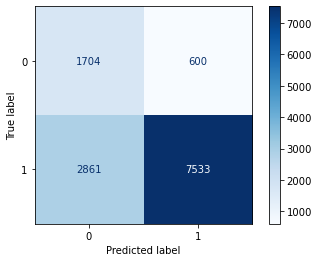

In [260]:
#try vectorising with n-grams on balanced dataset
#2-grams

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

num_features = 750 
vect2 = CountVectorizer(max_features=num_features, ngram_range = (2, 2))
X_train_2gram = vect2.fit_transform(X_train)
X_test_2gram = vect2.transform(X_test)

ROS = RandomOverSampler(sampling_strategy=1)
X_train_2gram_bal, y_train_2gram_bal = ROS.fit_resample(X_train_2gram, y_train)

#logregression
from sklearn import *
from sklearn.linear_model import LogisticRegression

logreg2_bal = LogisticRegression(max_iter=1000)
logreg2_bal.fit(X_train_2gram_bal, y_train_2gram_bal)
y_test_2gram_bal_log = logreg2_bal.predict(X_test_2gram)

plot_confusion_matrix(logreg2_bal,X_test_2gram, y_test, cmap = plt.cm.Blues)
accuracy = accuracy_score(y_test, y_test_2gram_bal_log)
print('Accuracy Score: ',accuracy)

In [261]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_test_2gram_bal_log)))
print("Precision:{}".format(precision_score(y_test, y_test_2gram_bal_log)))
print("Recall:{}".format(recall_score(y_test, y_test_2gram_bal_log)))
print('F1 score: {}'.format(f1_score(y_test, y_test_2gram_bal_log)))
print('MSE: {}'.format(mean_squared_error(y_test, y_test_2gram_bal_log)))
print('R2 score: {}'.format(r2_score(y_test, y_test_2gram_bal_log)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test, y_test_2gram_bal_log)))
print('\nClassification Report:\n {}'.format(classification_report(y_test, y_test_2gram_bal_log)))
print('Confusion matrix:')
confusion_matrix(y_test, y_test_2gram_bal_log)

Accuracy: 0.7274373917152307
Precision:0.9262264846919955
Recall:0.7247450452183952
F1 score: 0.813191558266314
MSE: 0.27256260828476925
R2 score: -0.8351507045998758
ROC AUC score: 0.7321641892758642

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.74      0.50      2304
           1       0.93      0.72      0.81     10394

    accuracy                           0.73     12698
   macro avg       0.65      0.73      0.65     12698
weighted avg       0.83      0.73      0.76     12698

Confusion matrix:


array([[1704,  600],
       [2861, 7533]])

In [16]:
#using recurrent neural network with tensorflow
import tensorflow as tf

2022-11-06 06:51:07.845282: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [18]:
#prep X_train data for rnn
max_features = 750
tokenizer = Tokenizer(num_words = max_features, split = ' ')
tokenizer.fit_on_texts(X_train.values)
X_train_rnn = tokenizer.texts_to_sequences(X_train.values)
X_train_rnn = pad_sequences(X_train_rnn)
print(X_train_rnn)

[[  0   0   0 ... 353 253 353]
 [  0   0   0 ...   1 108 498]
 [  0   0   0 ...  49  39 458]
 ...
 [  0   0   0 ...  65 199  11]
 [  0   0   0 ... 664 133 131]
 [  0   0   0 ... 626   9  12]]


In [19]:
print(X_train_rnn.ndim)
print(X_train_rnn.shape)

2
(38091, 1494)


In [20]:
#one hot transform y_train to 2 columns
y_train_rnn = pd.get_dummies(y_train)
print(y_train_rnn[:10])

       0  1
17268  0  1
3257   0  1
3028   1  0
28116  0  1
16879  0  1
13646  0  1
14138  1  0
811    1  0
11595  0  1
18769  0  1


In [21]:
y_train

17268    1
3257     1
3028     0
28116    1
16879    1
        ..
7763     1
15377    1
17730    1
28030    0
15725    1
Name: sentimentlabel, Length: 38091, dtype: int64

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

In [23]:
model = Sequential()
max_features = 750
output_dim = 128
model.add(Embedding(max_features, output_dim, input_length = X_train_rnn.shape[1]))
model.add(Dropout(0.4))
model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

2022-11-06 06:51:37.325189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1494, 128)         96000     
                                                                 
 dropout (Dropout)           (None, 1494, 128)         0         
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 116,674
Trainable params: 116,674
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
#warning it took over 3 hours to train this model
model.fit(X_train_rnn, y_train_rnn, epochs = 5, batch_size = 50, verbose = 1)

Epoch 1/5
762/762 [==============================] - 1630s 2s/step - loss: 0.3148 - accuracy: 0.8705
Epoch 2/5
762/762 [==============================] - 1581s 2s/step - loss: 0.2776 - accuracy: 0.8883
Epoch 3/5
762/762 [==============================] - 1658s 2s/step - loss: 0.2660 - accuracy: 0.8927
Epoch 4/5
762/762 [==============================] - 1543s 2s/step - loss: 0.2579 - accuracy: 0.8954
Epoch 5/5
762/762 [==============================] - 1614s 2s/step - loss: 0.2522 - accuracy: 0.8972


In [27]:
loss, accuracy = model.evaluate(X_train_rnn, y_train_rnn)
print('Loss: %f' % (loss*100))
print('Accuracy: %f' % (accuracy*100))

1191/1191 [==============================] - 248s 207ms/step - loss: 0.2296 - accuracy: 0.9085
Loss: 22.955187
Accuracy: 90.848231


In [28]:
X_test_rnn = tokenizer.texts_to_sequences(X_test.values)
X_test_rnn = pad_sequences(X_test_rnn, maxlen=1494, value=0)

In [29]:
print(X_test_rnn)

[[  0   0   0 ...   3 120  73]
 [  0   0   0 ... 682 120  48]
 [  0   0   0 ... 208 411  64]
 ...
 [  0   0   0 ...  33 286  92]
 [  0   0   0 ...  26   5  46]
 [  0   0   0 ...   9   3 138]]


In [30]:
sentiments = model.predict(X_test_rnn, batch_size=10, verbose = 1)

1270/1270 [==============================] - 213s 167ms/step


In [31]:
print(sentiments)

[[0.02718575 0.9728142 ]
 [0.00316545 0.9968346 ]
 [0.13904168 0.86095834]
 ...
 [0.00976357 0.99023646]
 [0.23113036 0.7688697 ]
 [0.12517507 0.87482494]]


In [32]:
import numpy as np
y_pred_rnn = sentiments[:,1] #prob of labelled 1 (positive)

In [33]:
y_pred_rnn = np.round(y_pred_rnn)

In [34]:
y_pred_rnn

array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)

In [36]:
print('Accuracy: {}'.format(accuracy_score(y_test,y_pred_rnn)))
print("Precision:{}".format(precision_score(y_test,y_pred_rnn)))
print("Recall:{}".format(recall_score(y_test,y_pred_rnn)))
print('F1 score: {}'.format(f1_score(y_test,y_pred_rnn)))
print('MSE: {}'.format(mean_squared_error(y_test,y_pred_rnn)))
print('R2 score: {}'.format(r2_score(y_test,y_pred_rnn)))
print('ROC AUC score: {}'.format(roc_auc_score(y_test,y_pred_rnn)))
print('\nClassification Report:\n {}'.format(classification_report(y_test,y_pred_rnn)))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred_rnn)

Accuracy: 0.8857300362261773
Precision:0.9102669969721993
Recall:0.9544929767173369
F1 score: 0.9318555393791387
MSE: 0.11426996377382265
R2 score: 0.2306259253468882
ROC AUC score: 0.7650069050253351

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.58      0.65      2304
           1       0.91      0.95      0.93     10394

    accuracy                           0.89     12698
   macro avg       0.82      0.77      0.79     12698
weighted avg       0.88      0.89      0.88     12698

Confusion matrix:


array([[1326,  978],
       [ 473, 9921]])

In [164]:
#results from previous RNN model with 500 features
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score
print('Accuracy: {}'.format(accuracy_score(y_test,y_pred_rnn)))
print("Precision:{}".format(precision_score(y_test, y_pred_rnn)))
print("Recall:{}".format(recall_score(y_test, y_pred_rnn)))
print('F1-score: {}'.format(f1_score(y_test, y_pred_rnn)))
print('Confusion matrix:')
confusion_matrix(y_pred_rnn, y_test)

Accuracy: 0.883028967254408
Precision:0.6674137158225011
Recall:0.6668159426780117
F1-score: 0.6671146953405017
Confusion matrix:


array([[9729,  744],
       [ 742, 1489]])

# Topic modelling

In [4]:
#LDA with Sklearn

import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [16]:
n_components = 10
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [17]:
#https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

# Use tf (raw term count) features for LDA.
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform((dfmodel['review_text']))

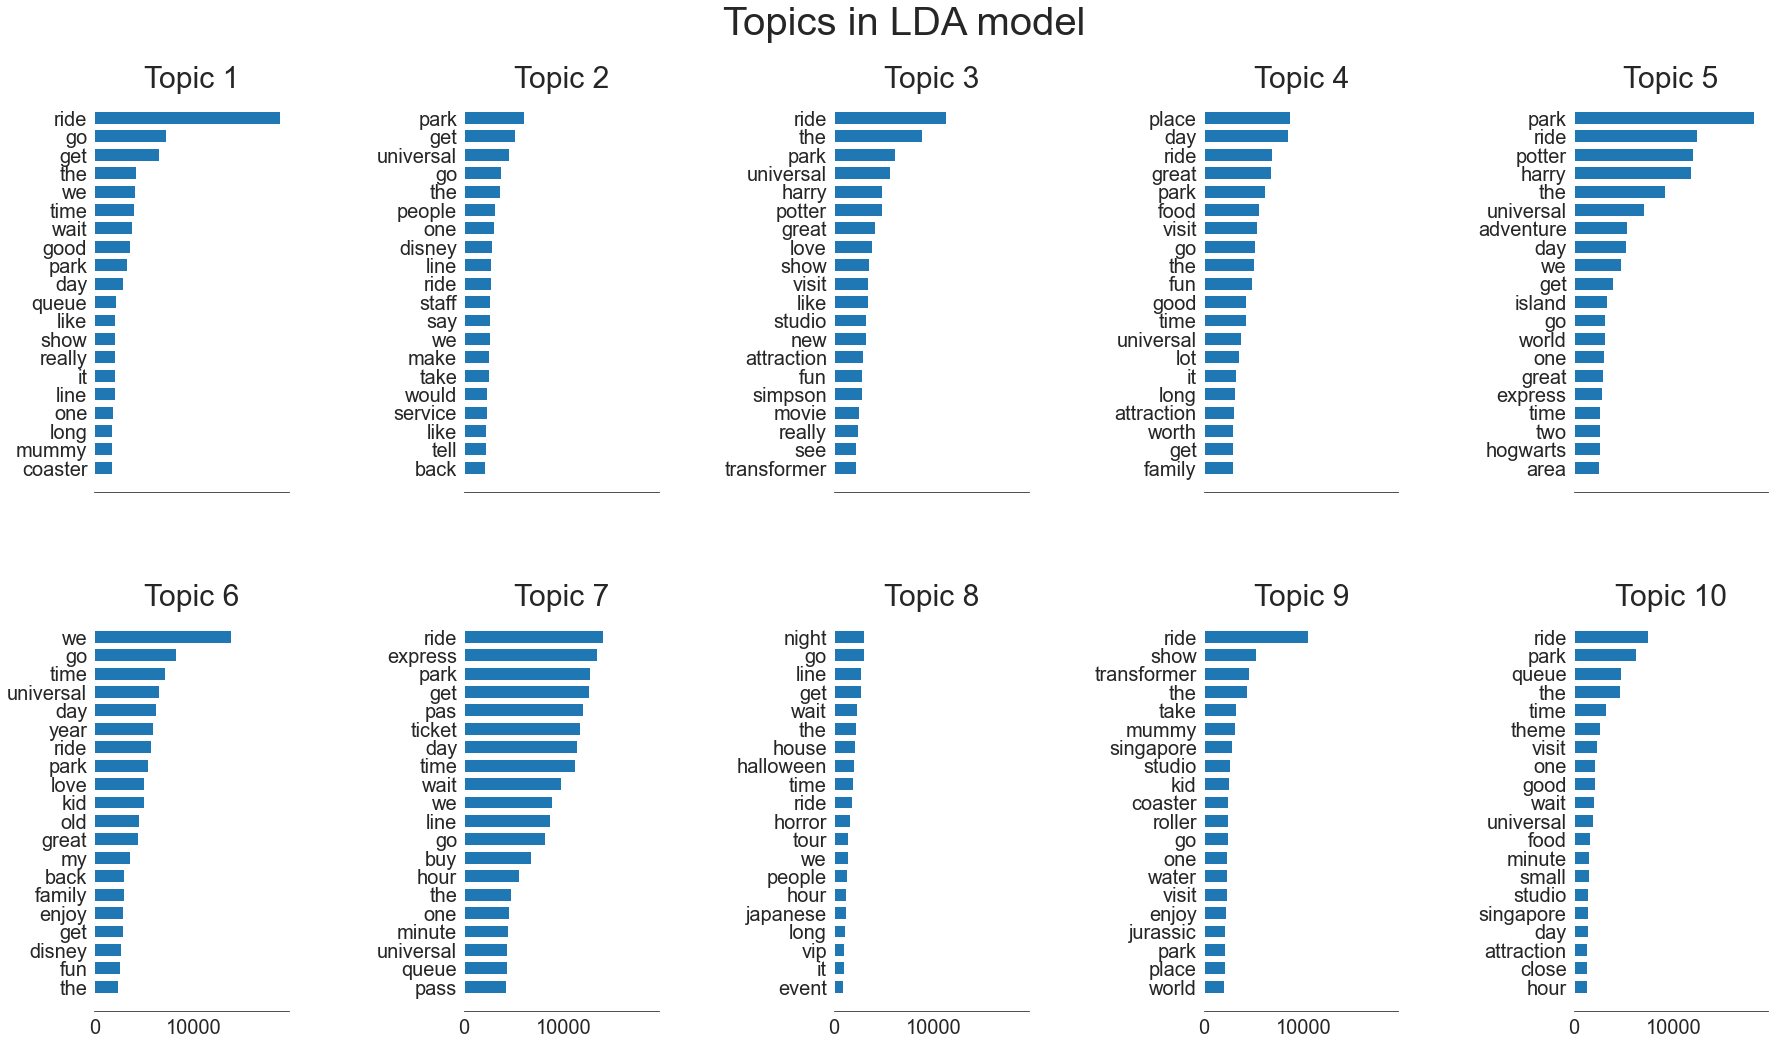

In [134]:
lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output1=lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [136]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(tf))

# See model parameters
print(lda.get_params())

Log Likelihood:  -22126796.899580427
Perplexity:  970.3829926514576
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [137]:
#5 topics

n_components = 5
n_top_words = 20



def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    

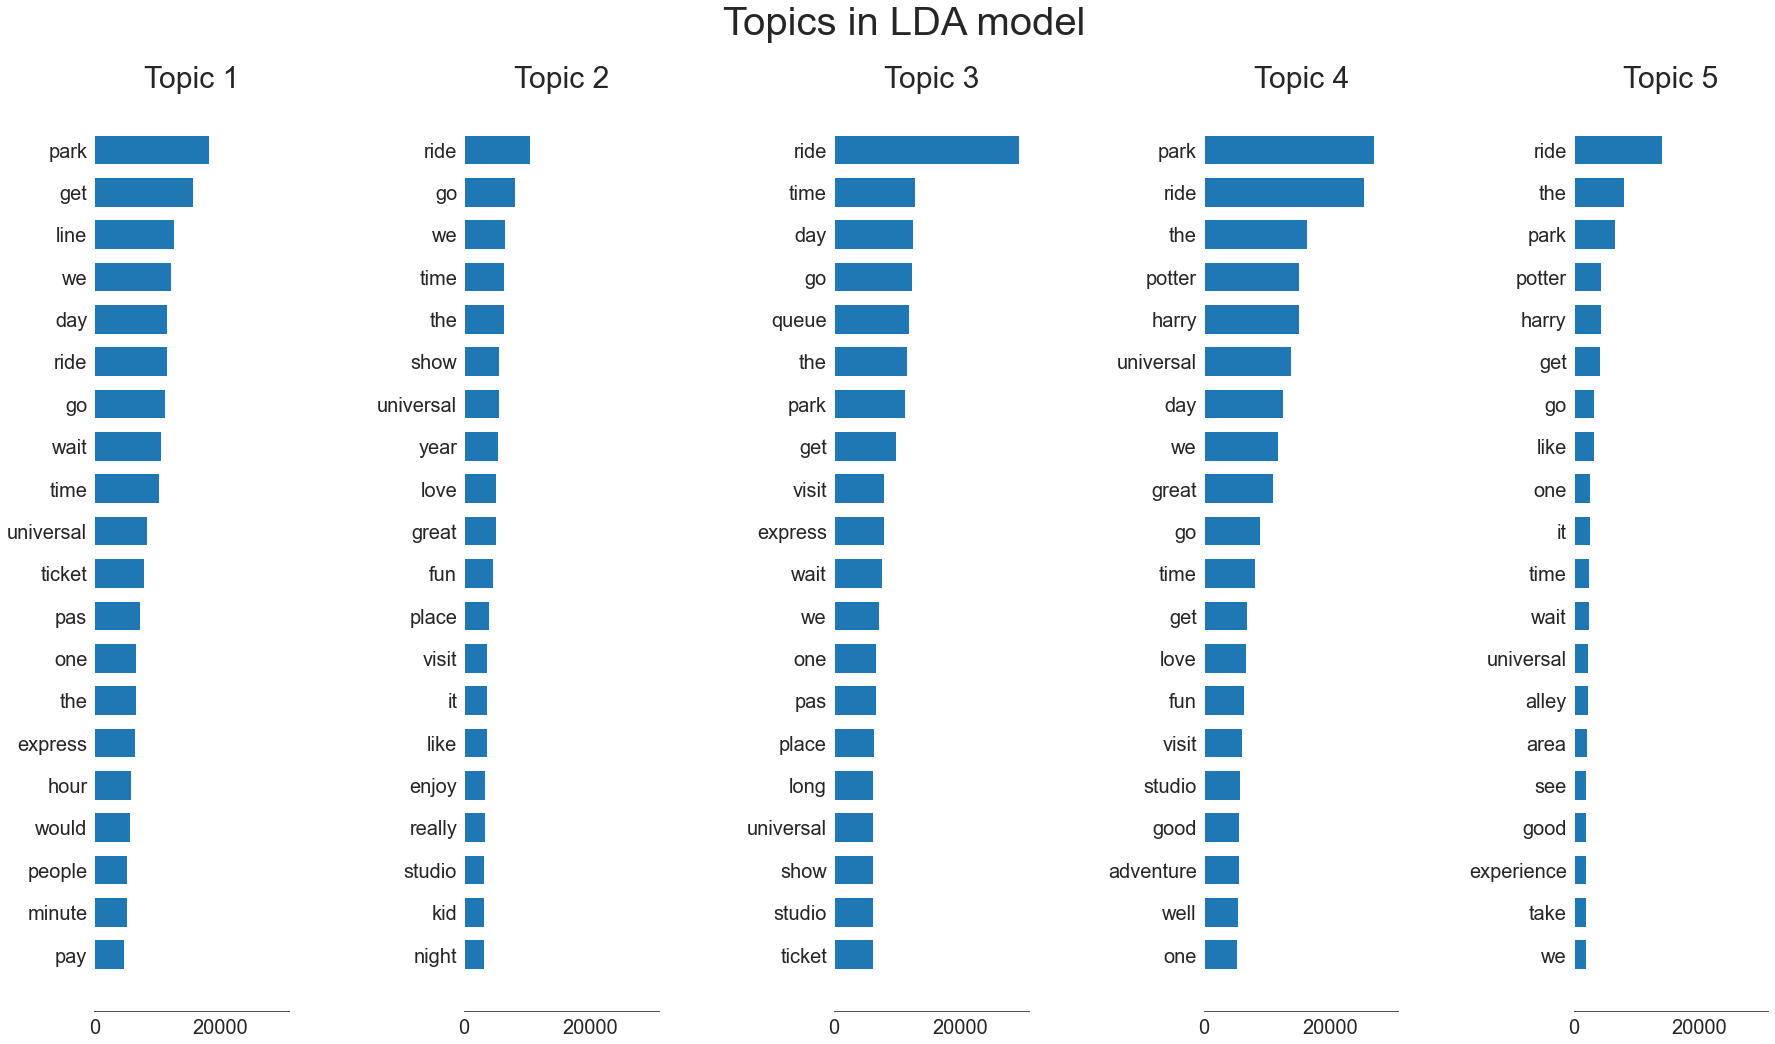

In [139]:
lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output1=lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [141]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(tf))

# See model parameters
print(lda.get_params())

Log Likelihood:  -22116435.508191824
Perplexity:  967.262765657837
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 5, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [142]:
#7 topics

n_components = 7
n_top_words = 20



def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 7, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

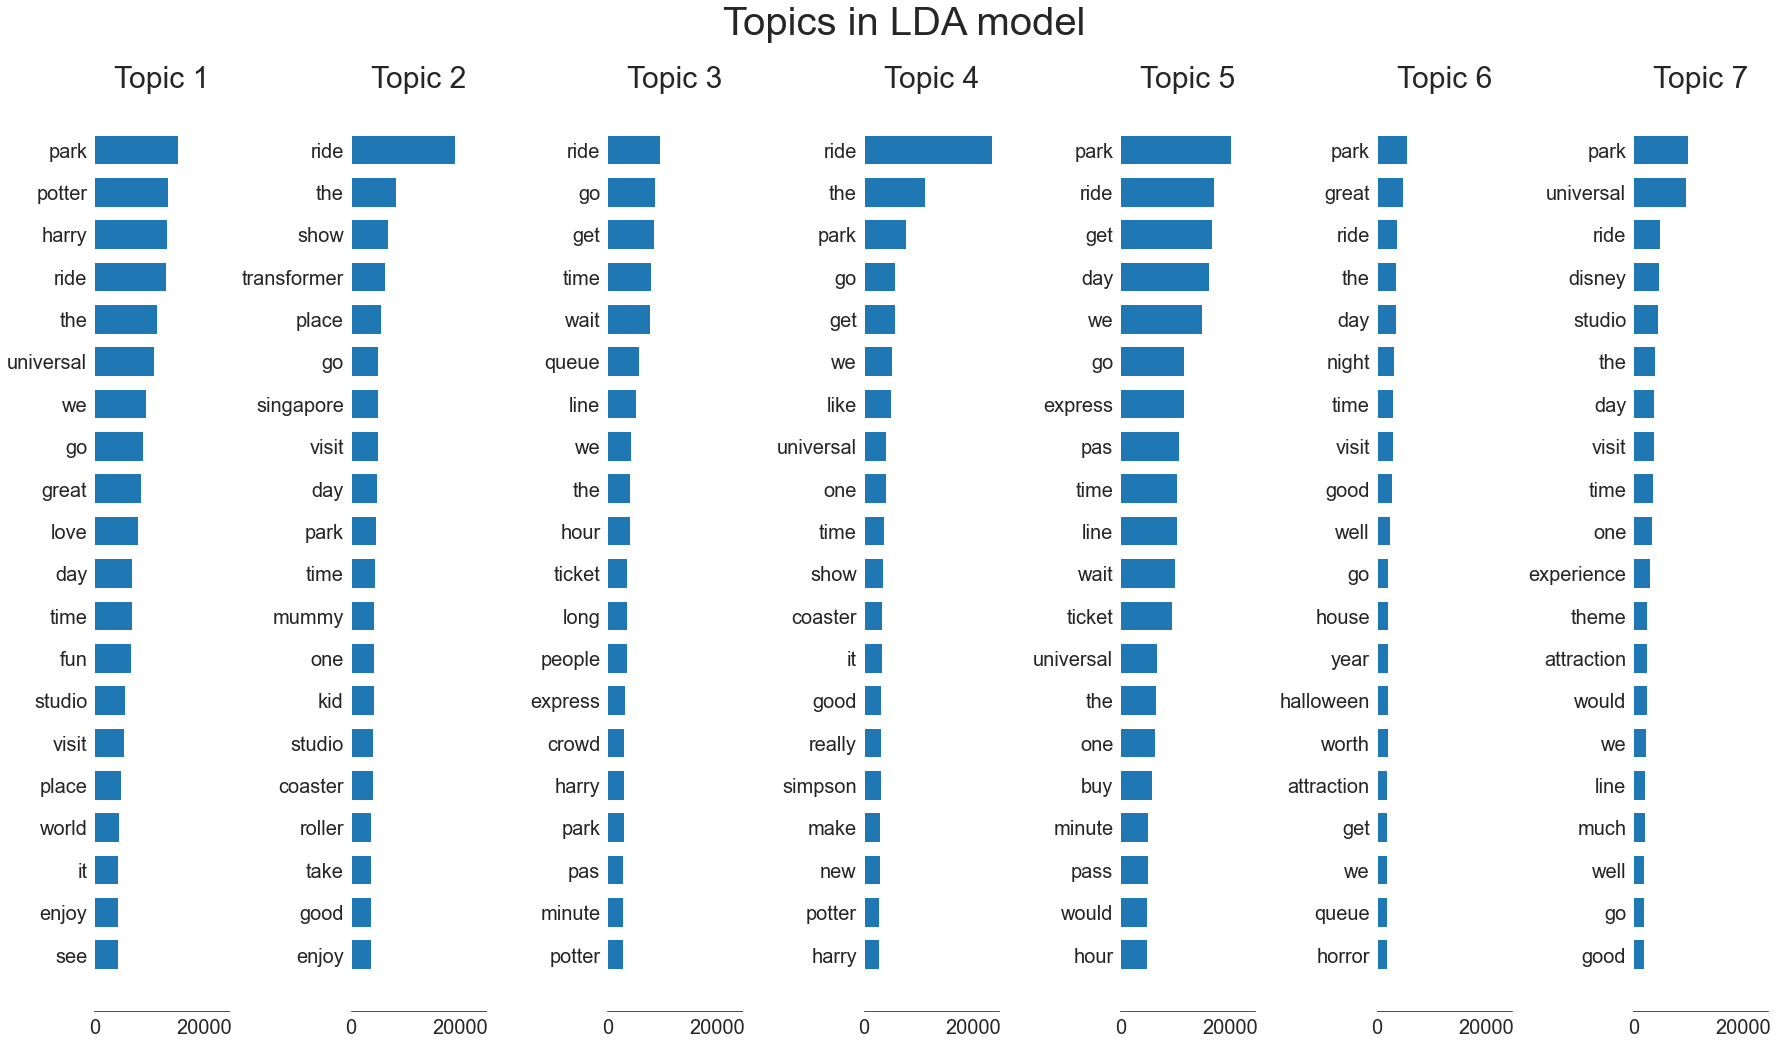

In [143]:
lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output1=lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [144]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(tf))

# See model parameters
print(lda.get_params())

Log Likelihood:  -22136917.83092998
Perplexity:  973.4405249767079
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 7, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [145]:
#Fitting LDA with bigrams with 5 topics 
#results of 5 and 7 are similar for business purposes 5 topics chosen as more manageable

tf2_vectorizer = CountVectorizer(ngram_range=(2,2))
tf2 = tf2_vectorizer.fit_transform(dfmodel['review_text'])

In [146]:
#5 topics

n_components = 5
n_top_words = 20



def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

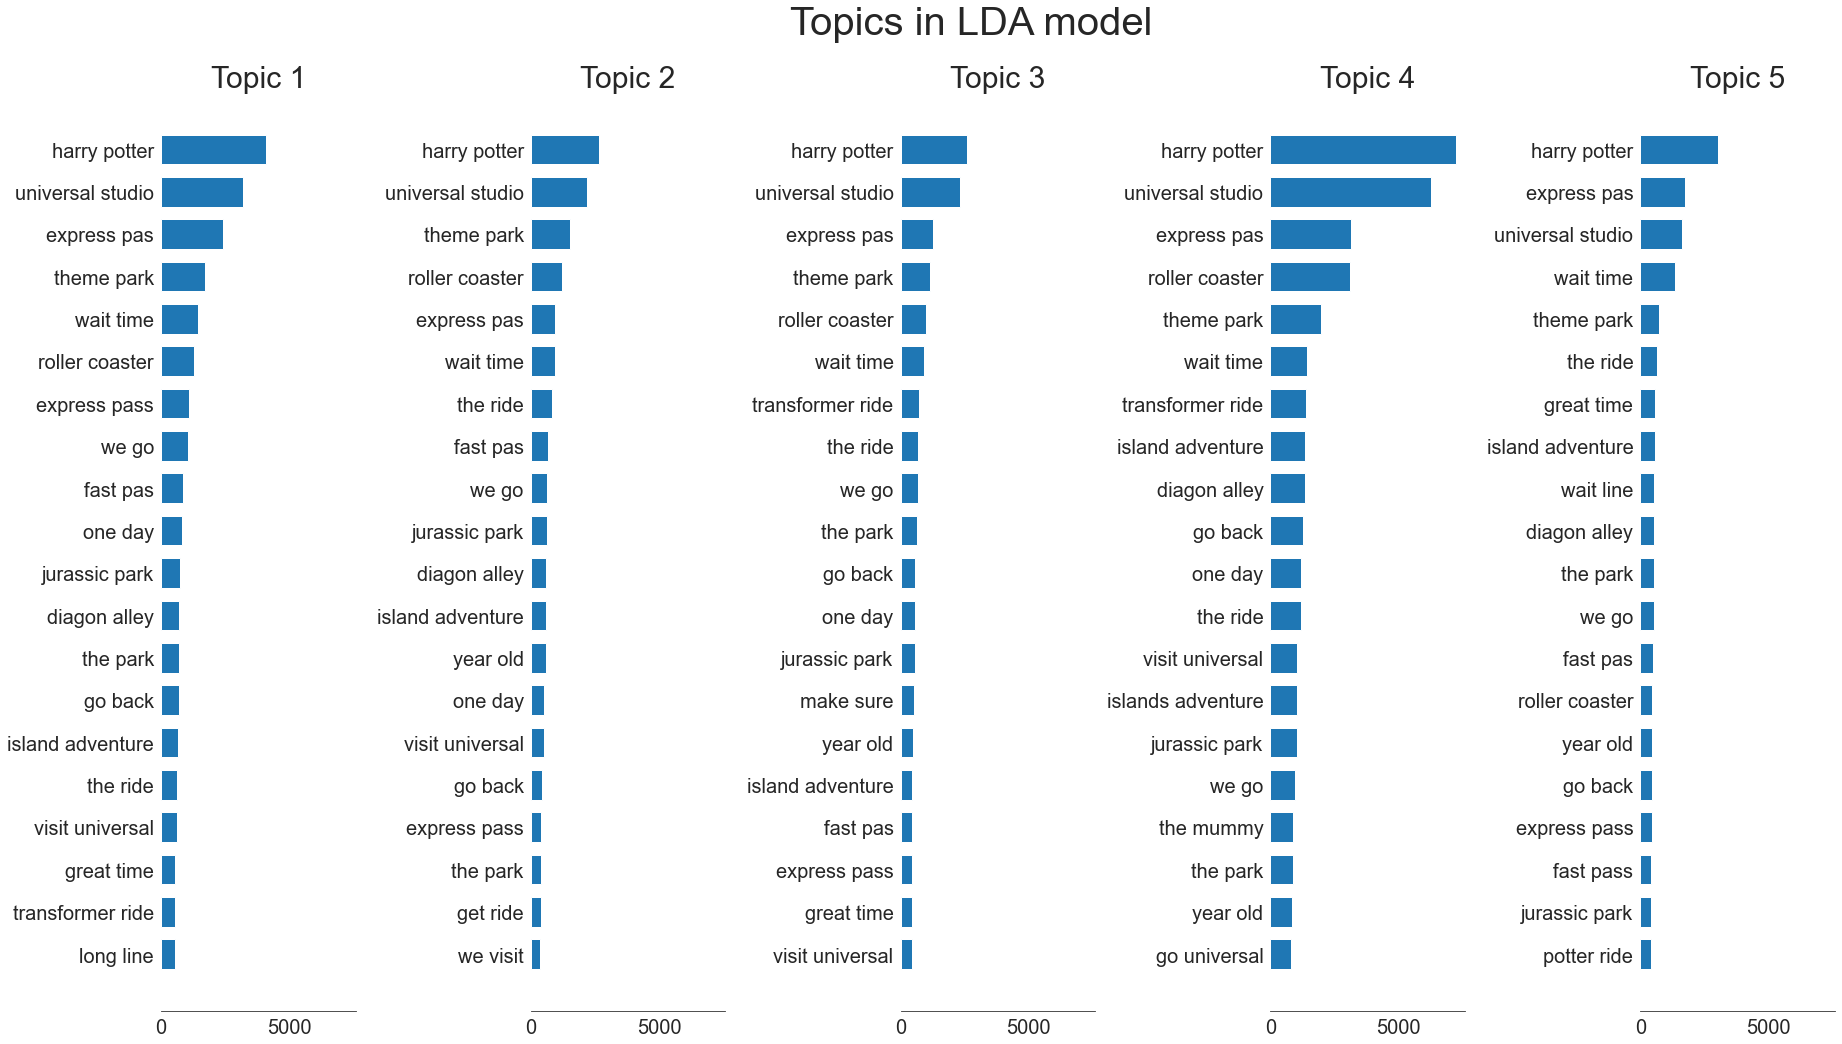

In [147]:
lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(tf2)

tf2_feature_names = tf2_vectorizer.get_feature_names()
plot_top_words(lda, tf2_feature_names, n_top_words, "Topics in LDA model")

In [148]:
#Fitting LDA with trigrams with 5 topics

tf3_vectorizer = CountVectorizer(ngram_range=(3,3))
tf3 = tf3_vectorizer.fit_transform(dfmodel['review_text'])

In [149]:
#5 topics

n_components = 5
n_top_words = 20



def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

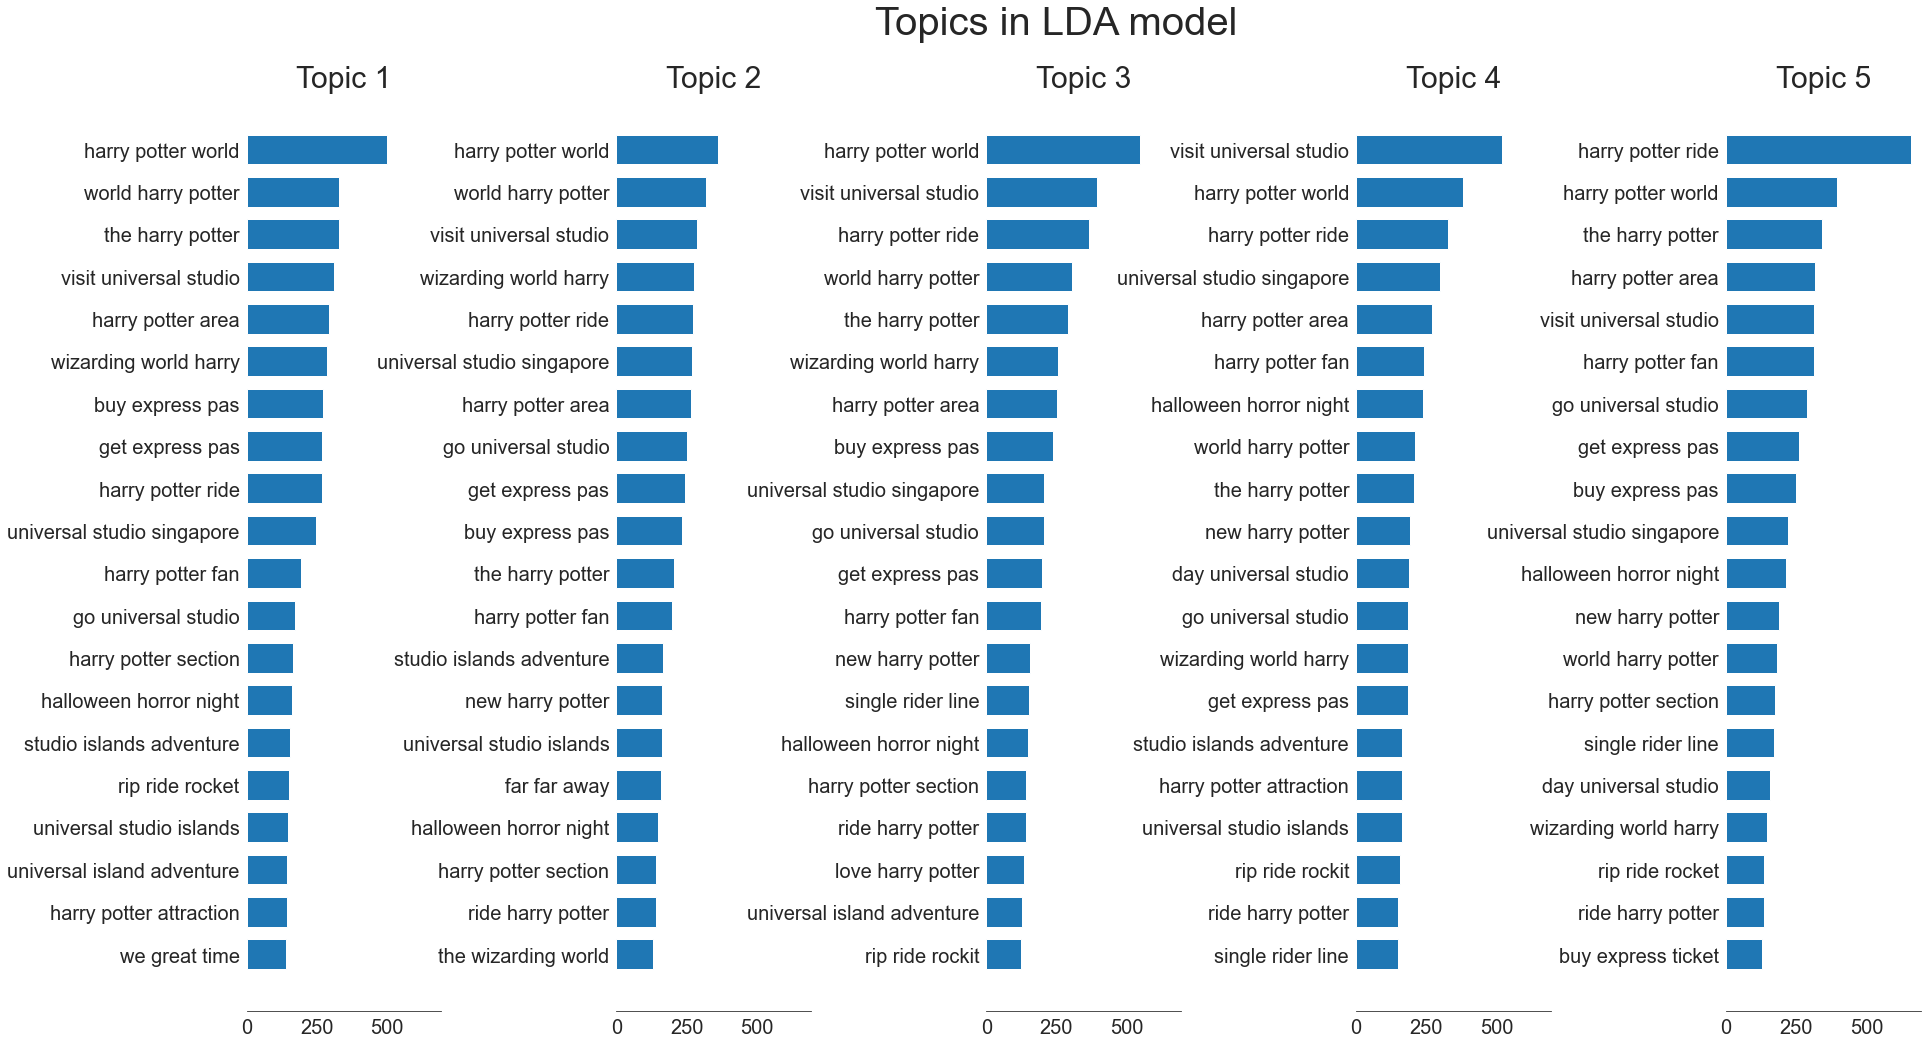

In [150]:
lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(tf3)

tf3_feature_names = tf3_vectorizer.get_feature_names()
plot_top_words(lda, tf3_feature_names, n_top_words, "Topics in LDA model")

In [25]:
#topic modelling on negative reviews
dfmodel_neg = dfmodel[dfmodel['sentimentlabel']==0]

In [26]:
dfmodel_neg

Unnamed: 0      reviewer  rating  written_date  \
0               0       Kelly B     2.0  May 30, 2021   
1               1           Jon     1.0  May 30, 2021   
2               2       Nerdy P     2.0  May 30, 2021   
5               5          John     1.0  May 28, 2021   
6               6  annapN7702ZW     2.0  May 27, 2021   
...           ...           ...     ...           ...   
50777       50892          NLIM     3.0  May 24, 2010   
50778       50893   Topshelf210     2.0  May 24, 2010   
50779       50894         Josie     2.0  May 21, 2010   
50780       50895          Alex     3.0  May 17, 2010   
50781       50896         ceno5     3.0  May 15, 2010   

                                                   title  \
0      Universal is a complete Disaster - stick with ...   
1                                   Food is hard to get.   
2                                           Disappointed   
5                                 This is not a vacation   
6                                          Expected More   
...                                                  ...   
50777                      HOT... and not in a good way.   
50778               Still has a lot of kinks to work out   
50779                             Should NOT be open yet   
50780                  A big dissapointment, a bad value   
50781                      small with very little crowds   

                                             review_text  \
0      we go universal memorial day weekend total tra...   
1      the food service horrible i review food it wai...   
2      i book vacation mainly ride hagrid motorcycle ...   
5      bad experience i ever rides outdated whole pla...   
6      i expect alot wait around lack staff price tic...   
...                                                  ...   
50777  ticket enter park cost sgd66 quite frankly bit...   
50778  upon entry decide head around park clockwise m...   
50779  while get far look like amaze i find quite unb...   
50780  i expect universal studio singapore par typica...   
50781  ride functional except one madagascar small co...   

                            branch sentiment date_object  year  ...  \
0        Universal Studios Florida  Negative  2021-05-30  2021  ...   
1        Universal Studios Florida  Negative  2021-05-30  2021  ...   
2        Universal Studios Florida  Negative  2021-05-30  2021  ...   
5        Universal Studios Florida  Negative  2021-05-28  2021  ...   
6        Universal Studios Florida  Negative  2021-05-27  2021  ...   
...                            ...       ...         ...   ...  ...   
50777  Universal Studios Singapore  Negative  2010-05-24  2010  ...   
50778  Universal Studios Singapore  Negative  2010-05-24  2010  ...   
50779  Universal Studios Singapore  Negative  2010-05-21  2010  ...   
50780  Universal Studios Singapore  Negative  2010-05-17  2010  ...   
50781  Universal Studios Singapore  Negative  2010-05-15  2010  ...   

                                               review_og  review length  \
0      We went to Universal over Memorial Day weekend...           1354   
1      The food service is horrible. I’m not reviewin...            201   
2      I booked this vacation mainly to ride Hagrid m...           1274   
5      Worst experience I have ever had the rides are...            286   
6      I just expected more. Alot of waiting around, ...            427   
...                                                  ...            ...   
50777  Ticket to enter the park costs SGD66.00 which ...            963   
50778  Upon our entry, we decided to head around the ...           8919   
50779  While what they have got so far looks like it ...           1210   
50780  I expected Universal Studios Singapore to be i...           1814   
50781  most of the rides are functional except for th...            404   

       wordcounts_title wordcounts_reviewtext  \
0                     9                   255   
1                     5     

In [75]:
#topic modelling for negative reviews
n_components = 5
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

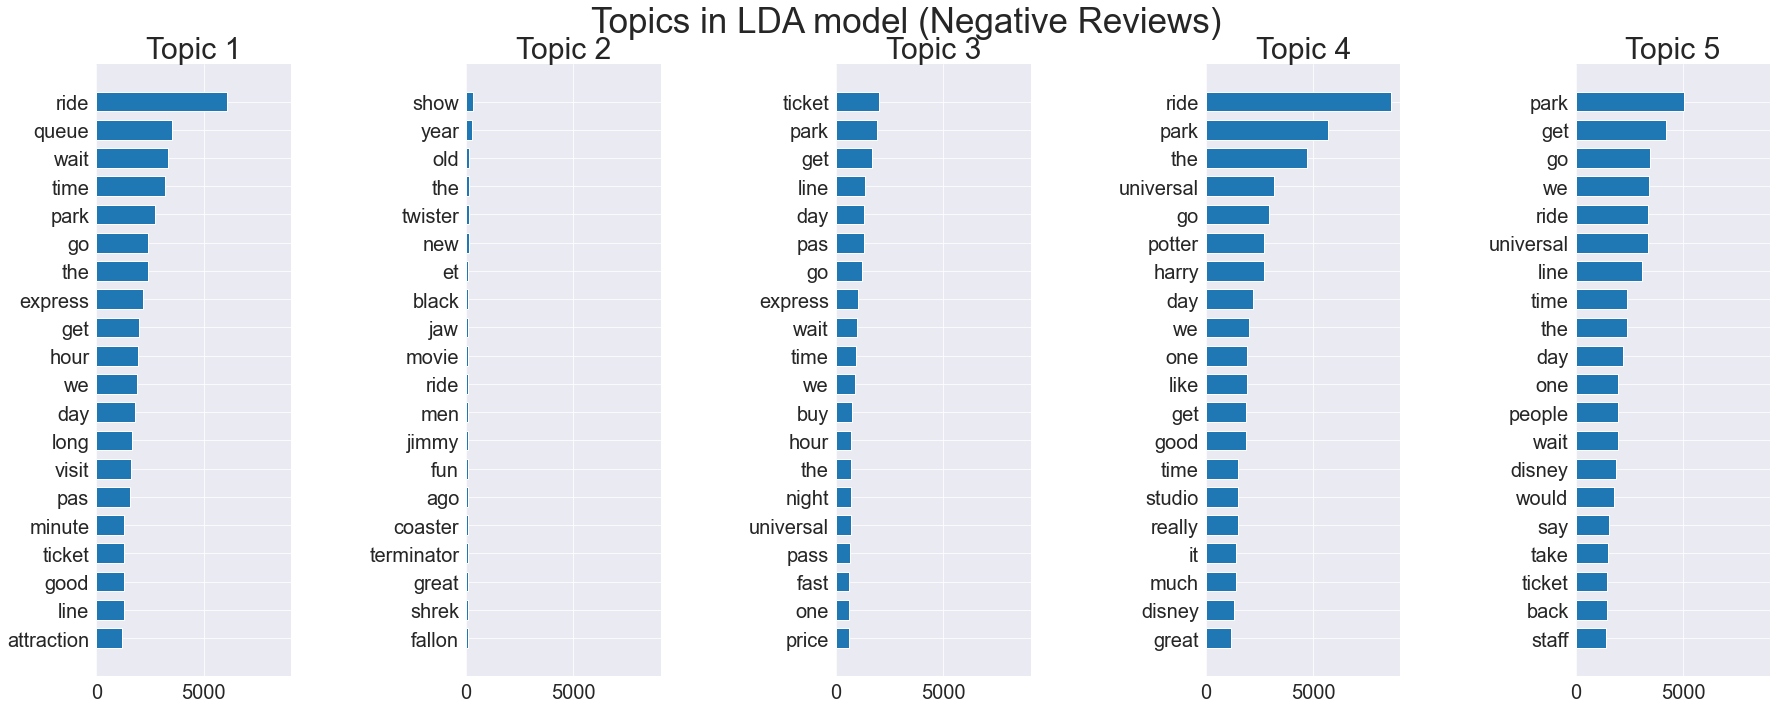

In [76]:
#Fitting LDA with with 5 topics

neg_vectorizer = CountVectorizer(ngram_range=(1,1))
neg_reviews = neg_vectorizer.fit_transform(dfmodel_neg['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(neg_reviews)

neg_feature_names = neg_vectorizer.get_feature_names()
plot_top_words(lda, neg_feature_names, n_top_words, "Topics in LDA model (Negative Reviews)")

In [77]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(neg_reviews))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(neg_reviews))

# See model parameters
print(lda.get_params())

Log Likelihood:  -5222078.520289685
Perplexity:  1120.3382076199052
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 5, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


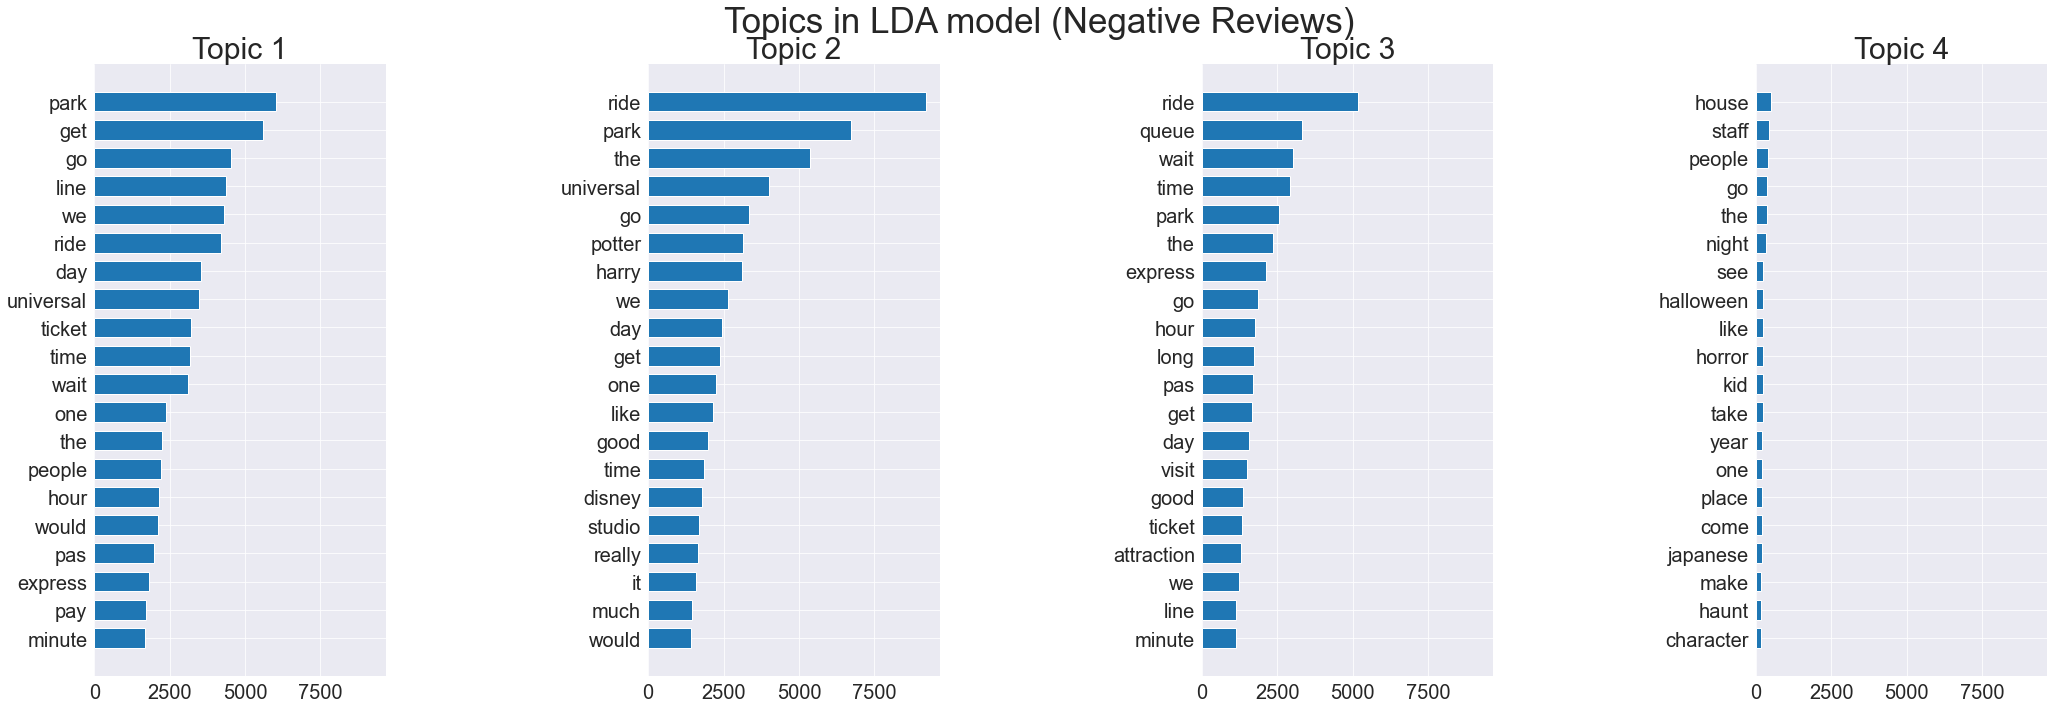

In [78]:
#fitting with 4 topics
n_components = 4
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(35, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
neg_vectorizer = CountVectorizer(ngram_range=(1,1))
neg_reviews = neg_vectorizer.fit_transform(dfmodel_neg['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(neg_reviews)

neg_feature_names = neg_vectorizer.get_feature_names()
plot_top_words(lda, neg_feature_names, n_top_words, "Topics in LDA model (Negative Reviews)")

In [79]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda.score(neg_reviews))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(neg_reviews))

# See model parameters
print(lda.get_params())

Log Likelihood:  -5213282.042938756
Perplexity:  1107.1656037794385
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 4, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


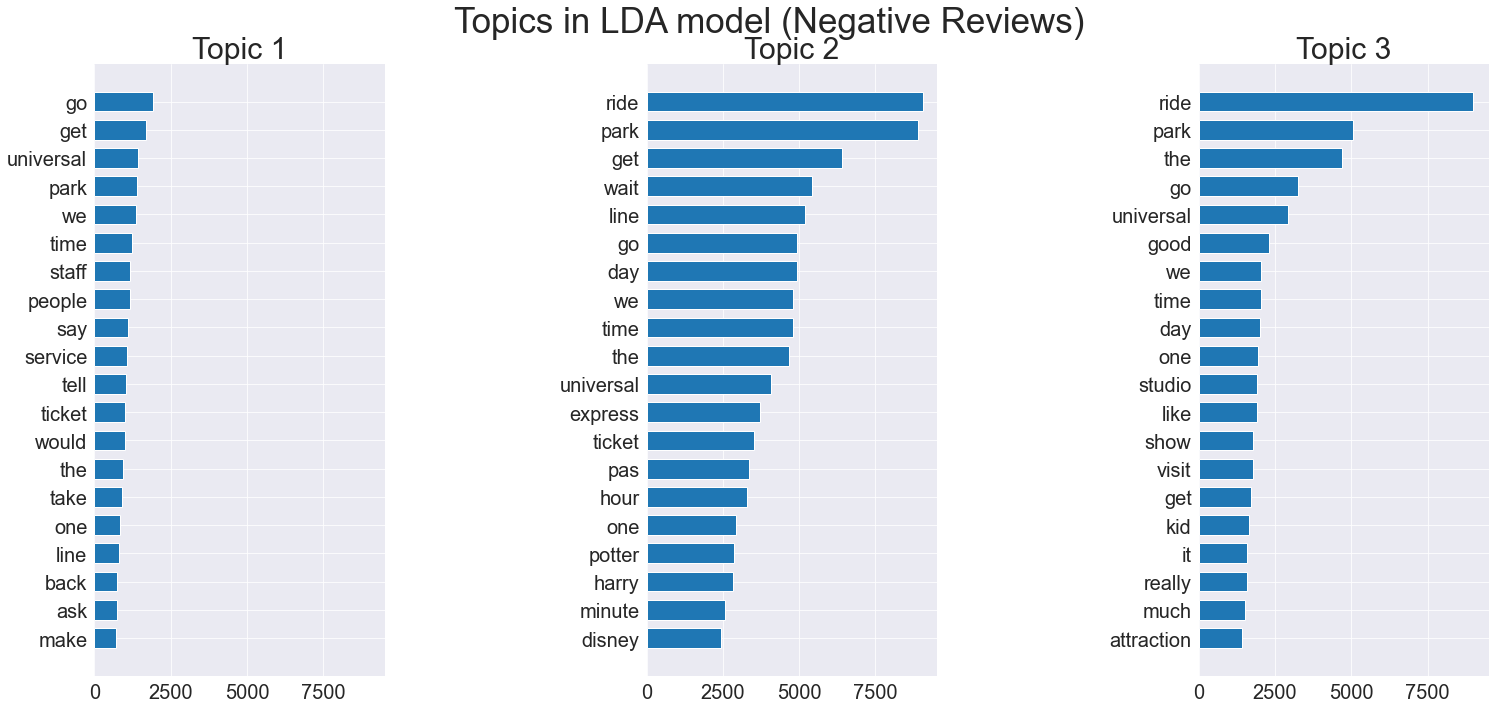

In [80]:
#fitting with 3 topics
n_components = 3
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
neg_vectorizer = CountVectorizer(ngram_range=(1,1))
neg_reviews = neg_vectorizer.fit_transform(dfmodel_neg['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(neg_reviews)

neg_feature_names = neg_vectorizer.get_feature_names()
plot_top_words(lda, neg_feature_names, n_top_words, "Topics in LDA model (Negative Reviews)")

In [81]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda.score(neg_reviews))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(neg_reviews))

# See model parameters
print(lda.get_params())

Log Likelihood:  -5211932.082171267
Perplexity:  1105.1578100549466
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 3, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


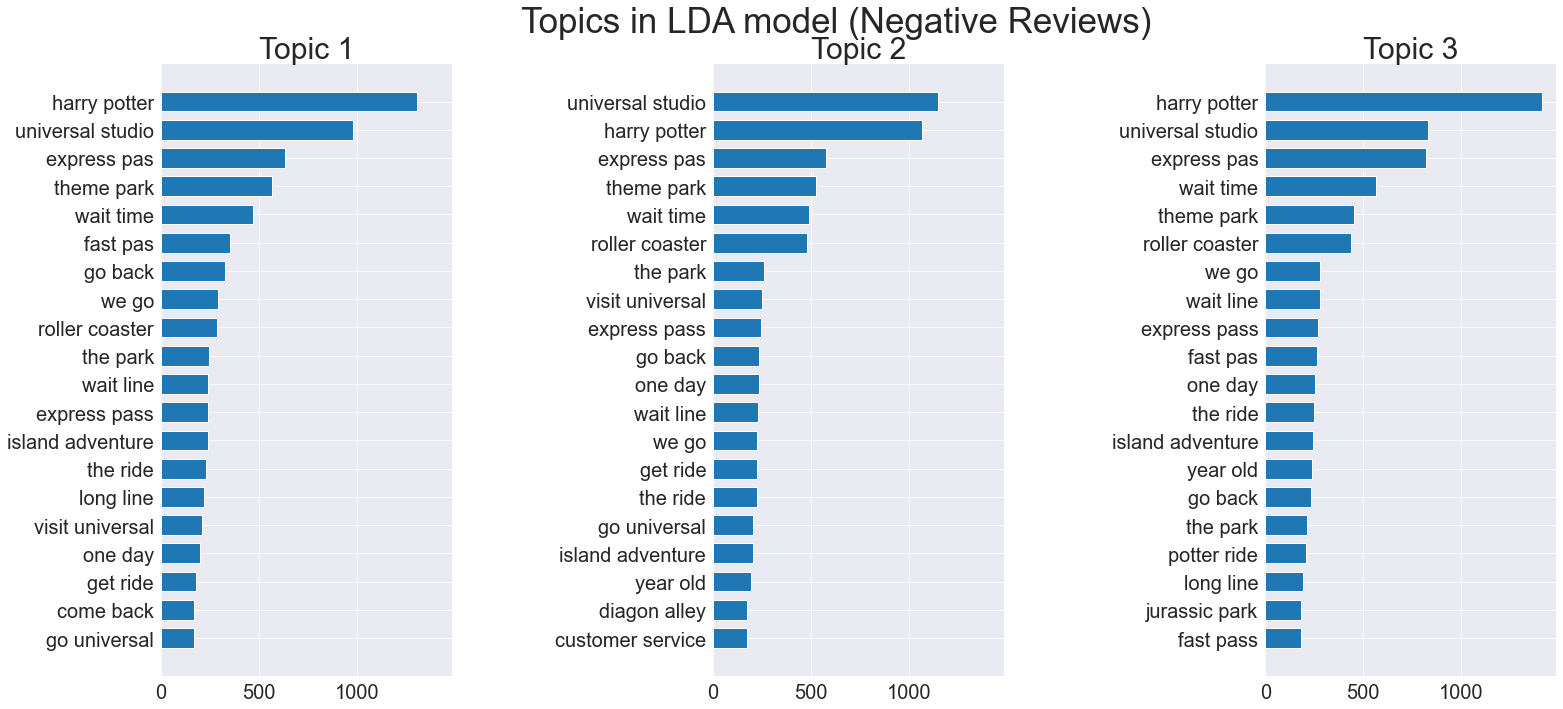

In [82]:
#choose to stick with 3 topics

#fitting LDA with bigrams with 3 topics
n_components = 3
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
neg_2gram_vectorizer = CountVectorizer(ngram_range=(2,2))
neg_2gram = neg_2gram_vectorizer.fit_transform(dfmodel_neg['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(neg_2gram)

neg_2gram_feature_names = neg_2gram_vectorizer.get_feature_names()
plot_top_words(lda, neg_2gram_feature_names, n_top_words, "Topics in LDA model (Negative Reviews)")

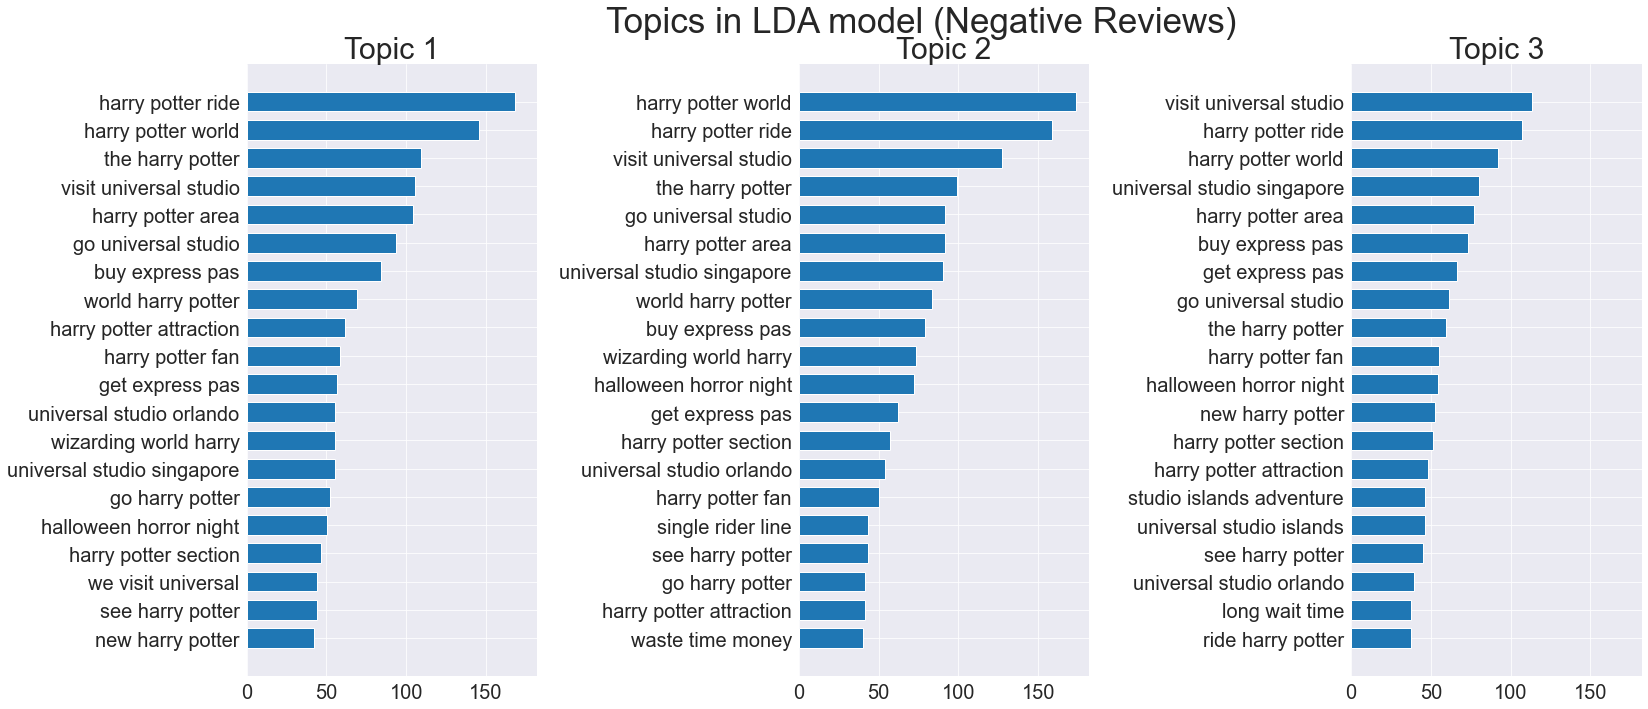

In [83]:
#Fitting LDA with trigrams with 3 topics
n_components = 3
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
neg_3gram_vectorizer = CountVectorizer(ngram_range=(3,3))
neg_3gram = neg_3gram_vectorizer.fit_transform(dfmodel_neg['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(neg_3gram)

neg_3gram_feature_names = neg_3gram_vectorizer.get_feature_names()
plot_top_words(lda, neg_3gram_feature_names, n_top_words, "Topics in LDA model (Negative Reviews)")

In [8]:
#topic modelling on positive reviews
dfmodel_pos = dfmodel[dfmodel['sentimentlabel']==1]

In [9]:
dfmodel_pos

Unnamed: 0              reviewer  rating       written_date  \
3               3             ran101278     4.0       May 29, 2021   
4               4       tammies20132015     5.0       May 28, 2021   
9               9                   Jen     4.0       May 26, 2021   
11             11              Mandee L     5.0       May 25, 2021   
14             14               Nancy C     5.0       May 24, 2021   
...           ...                   ...     ...                ...   
50784       50899                vinz20     4.0     March 29, 2010   
50785       50900               betty l     4.0     March 29, 2010   
50786       50901             spoonos65     4.0     March 28, 2010   
50787       50902  HeatSeekerWrexham_UK     4.0     March 22, 2010   
50788       50903          sc_myinitial     5.0  February 24, 2010   

                                        title  \
3                                  My opinion   
4           The Bourne Stuntacular...MUST SEE   
9             Good first time visit with kids   
11                        Family Vacation Fun   
14                         Excellent Vacation   
...                                       ...   
50784                I'll Be Back Only If ...   
50785  Universal Studios Singapore Experience   
50786      Impressive but not quite finished!   
50787            Small but beautifully marked   
50788                 Excellent Sneak Preview   

                                             review_text  \
3      when person try test seat ride get green light...   
4      ok i stress enough anyone everyone go universa...   
9      we spend night site sapphire fall family adult...   
11     universal adventure park best two go both impr...   
14     for age ride restaurant lot photo opportunity ...   
...                                                  ...   
50784  this first visit universal studio theme park i...   
50785  we finally visit singapore first theme park un...   
50786  we visit first week soft opening unfortunately...   
50787  we visit 3rd day soft open ticket sale limit l...   
50788  my group manage get ticket february sneak prev...   

                            branch sentiment date_object  year  ...  \
3        Universal Studios Florida  Positive  2021-05-29  2021  ...   
4        Universal Studios Florida  Positive  2021-05-28  2021  ...   
9        Universal Studios Florida  Positive  2021-05-26  2021  ...   
11       Universal Studios Florida  Positive  2021-05-25  2021  ...   
14       Universal Studios Florida  Positive  2021-05-24  2021  ...   
...                            ...       ...         ...   ...  ...   
50784  Universal Studios Singapore  Positive  2010-03-29  2010  ...   
50785  Universal Studios Singapore  Positive  2010-03-29  2010  ...   
50786  Universal Studios Singapore  Positive  2010-03-28  2010  ...   
50787  Universal Studios Singapore  Positive  2010-03-22  2010  ...   
50788  Universal Studios Singapore  Positive  2010-02-24  2010  ...   

                                               review_og  review length  \
3      When a person tries the test seat for the ride...            286   
4      Ok, I can't stress enough to anyone and everyo...            502   
9      We spent 6 nights on site at Sapphire Falls as...           5746   
11     Universal Adventure Park was the best out of t...            185   
14     For all ages rides and restaurants lots of pho...            116   
...                                                  ...            ...   
50784  This is my first visit to a Universal Studio t...           2021   
50785  We finally visited Singapore's very first them...           2423   
50786  We visited during the first week of its 'soft ...            935   
50787  We visited on the 3rd day of the 'soft' openin...           1279   
50788  My group managed to get the tickets for the 16...           2386   

       wordcounts_title wordcounts_reviewtext  \
3                     2                    55   
4   

In [10]:
#topic modelling for positive reviews
n_components = 5
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 5, figsize=(30, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

/Users/jacquelinelee/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


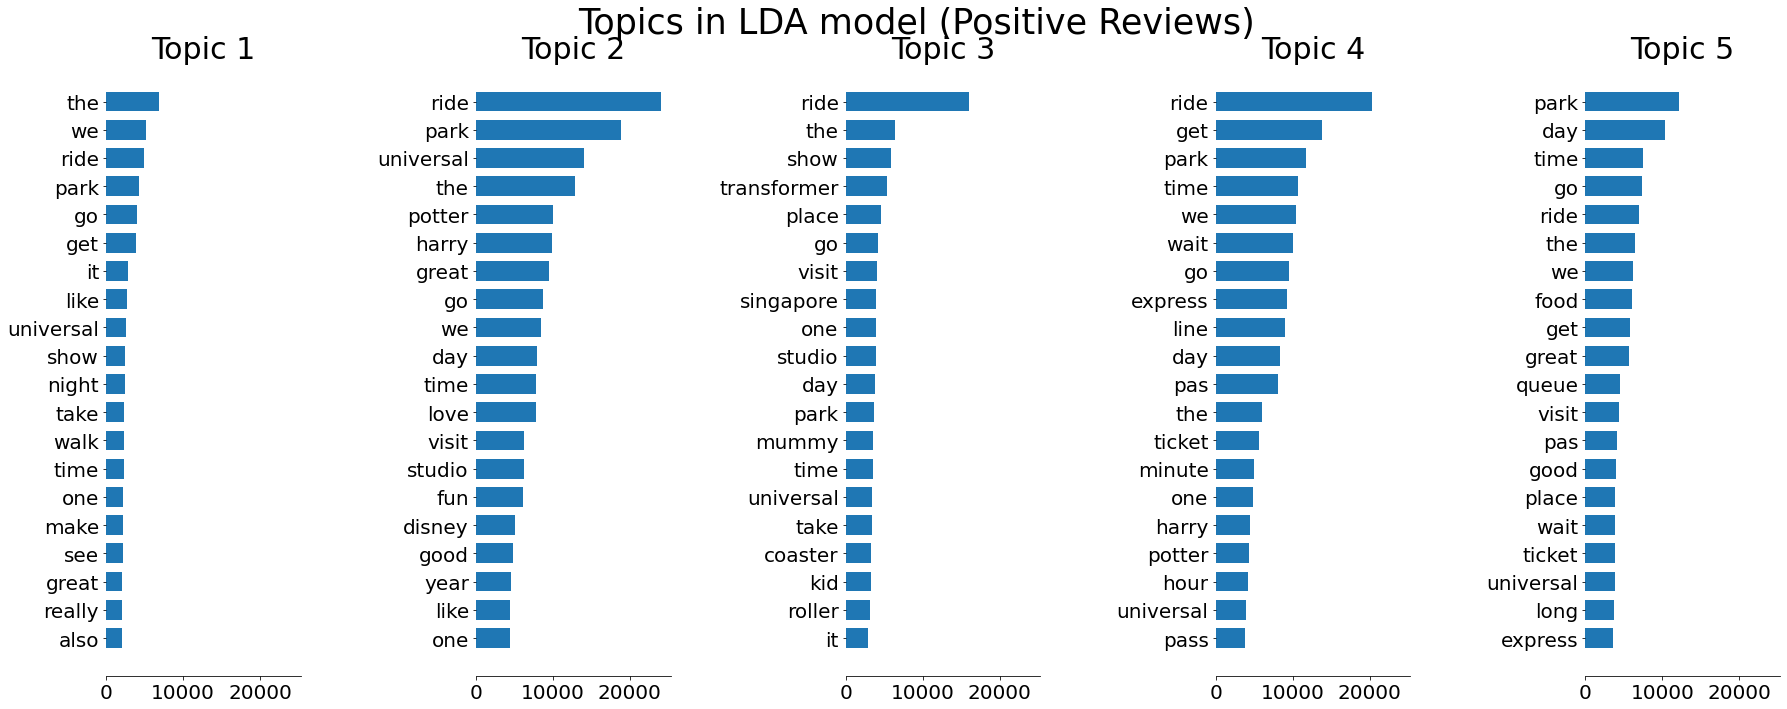

In [11]:
#Fitting LDA with with 5 topics

pos_vectorizer = CountVectorizer(ngram_range=(1,1))
pos_reviews = pos_vectorizer.fit_transform(dfmodel_pos['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(pos_reviews)

pos_feature_names = pos_vectorizer.get_feature_names()
plot_top_words(lda, pos_feature_names, n_top_words, "Topics in LDA model (Positive Reviews)")

In [12]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(pos_reviews))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(pos_reviews))

# See model parameters
print(lda.get_params())

Log Likelihood:  -16845165.82277807
Perplexity:  914.0191792994312
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 5, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


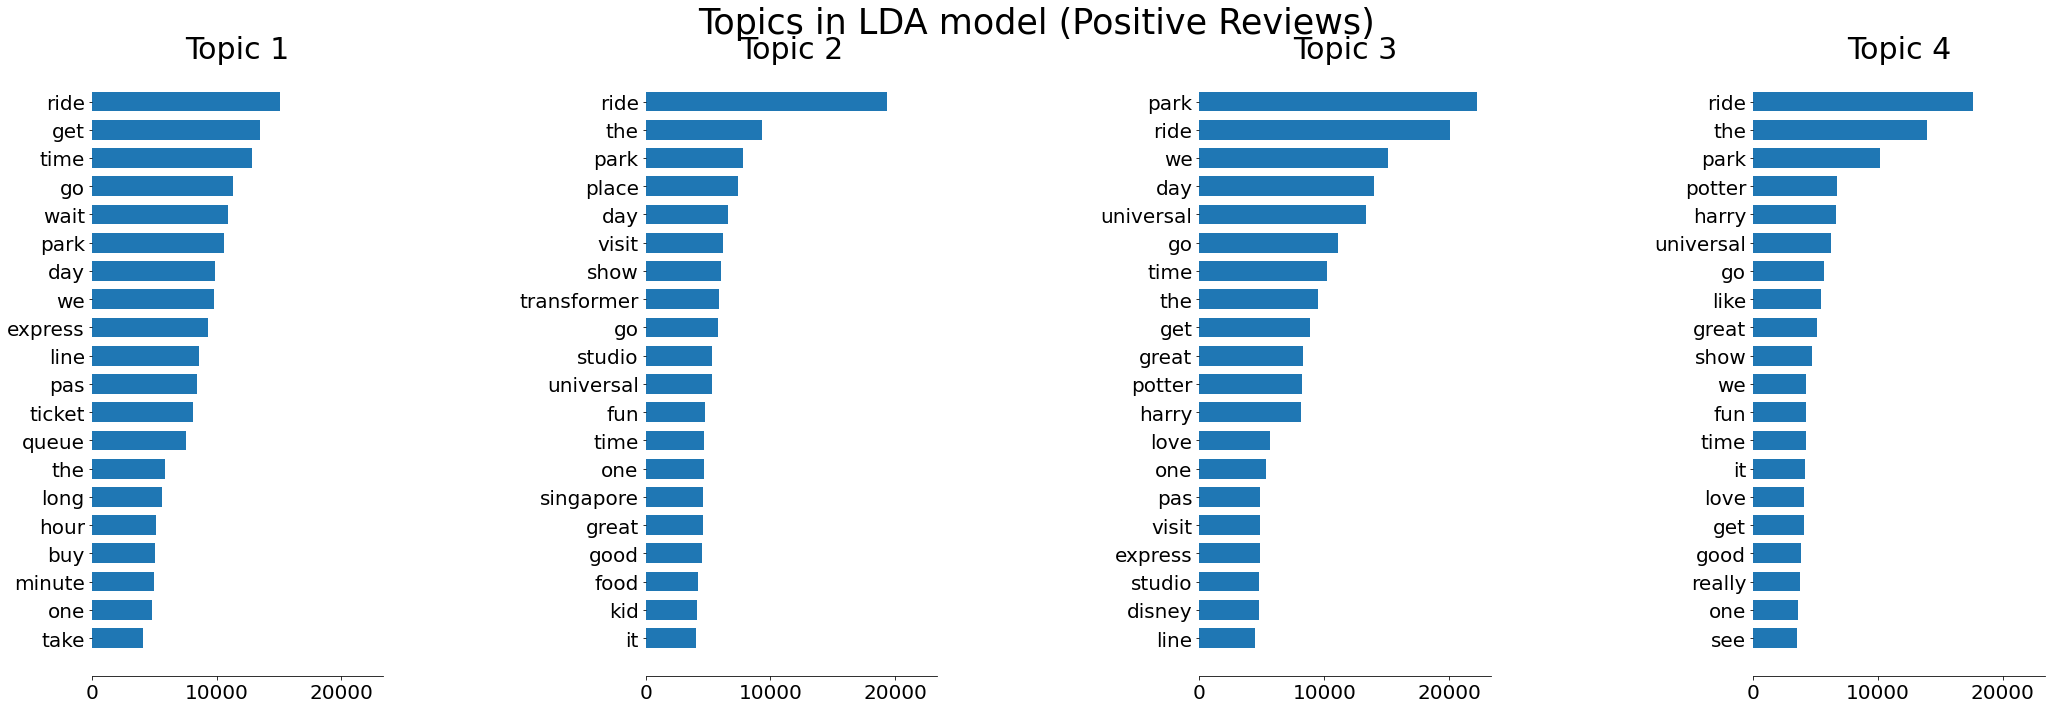

In [13]:
#fitting with 4 topics
n_components = 4
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(35, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
pos_vectorizer = CountVectorizer(ngram_range=(1,1))
pos_reviews = pos_vectorizer.fit_transform(dfmodel_pos['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(pos_reviews)

pos_feature_names = pos_vectorizer.get_feature_names()
plot_top_words(lda, pos_feature_names, n_top_words, "Topics in LDA model (Positive Reviews)")

In [14]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda.score(pos_reviews))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(pos_reviews))

# See model parameters
print(lda.get_params())

Log Likelihood:  -16843502.736180805
Perplexity:  913.4041493467832
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 4, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


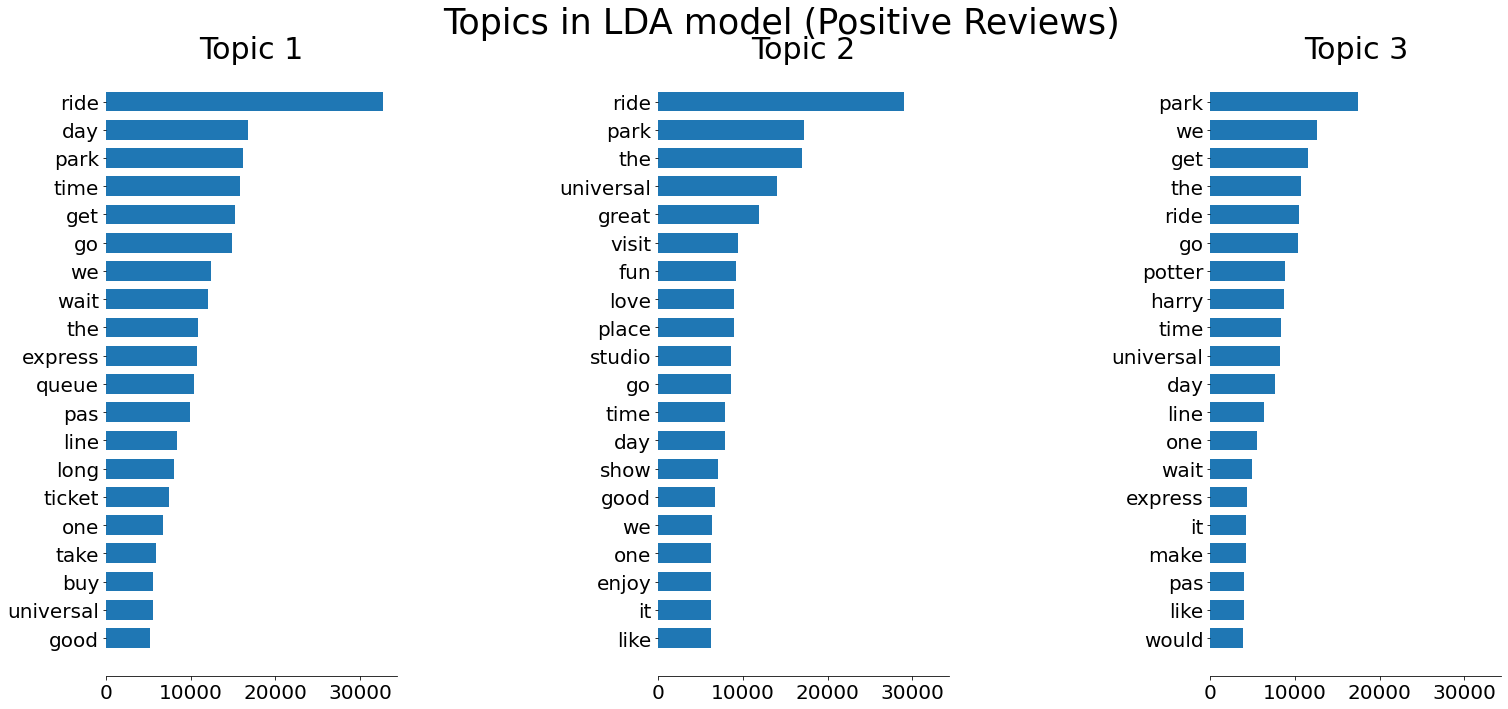

In [15]:
#fitting with 3 topics
n_components = 3
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(25, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
pos_vectorizer = CountVectorizer(ngram_range=(1,1))
pos_reviews = pos_vectorizer.fit_transform(dfmodel_pos['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(pos_reviews)

pos_feature_names = pos_vectorizer.get_feature_names()
plot_top_words(lda, pos_feature_names, n_top_words, "Topics in LDA model (Positive Reviews)")

In [16]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", lda.score(pos_reviews))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(pos_reviews))

# See model parameters
print(lda.get_params())

Log Likelihood:  -16862711.117232855
Perplexity:  920.5329301558301
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 3, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': None, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


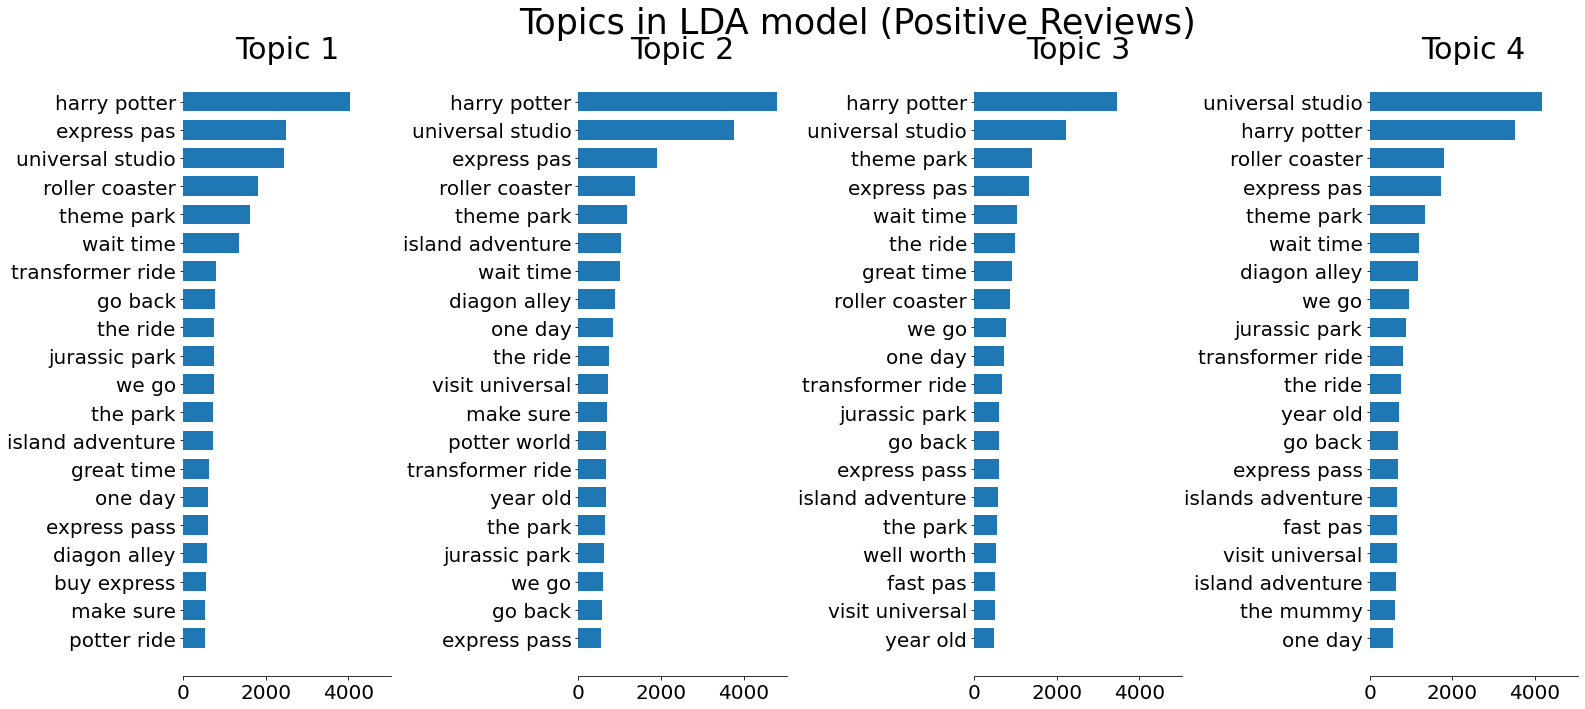

In [17]:
#choose to stick with 4 topics

#fitting LDA with bigrams with 4 topics
n_components = 4
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(25, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
pos_2gram_vectorizer = CountVectorizer(ngram_range=(2,2))
pos_2gram = pos_2gram_vectorizer.fit_transform(dfmodel_pos['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(pos_2gram)

pos_2gram_feature_names = pos_2gram_vectorizer.get_feature_names()
plot_top_words(lda, pos_2gram_feature_names, n_top_words, "Topics in LDA model (Positive Reviews)")

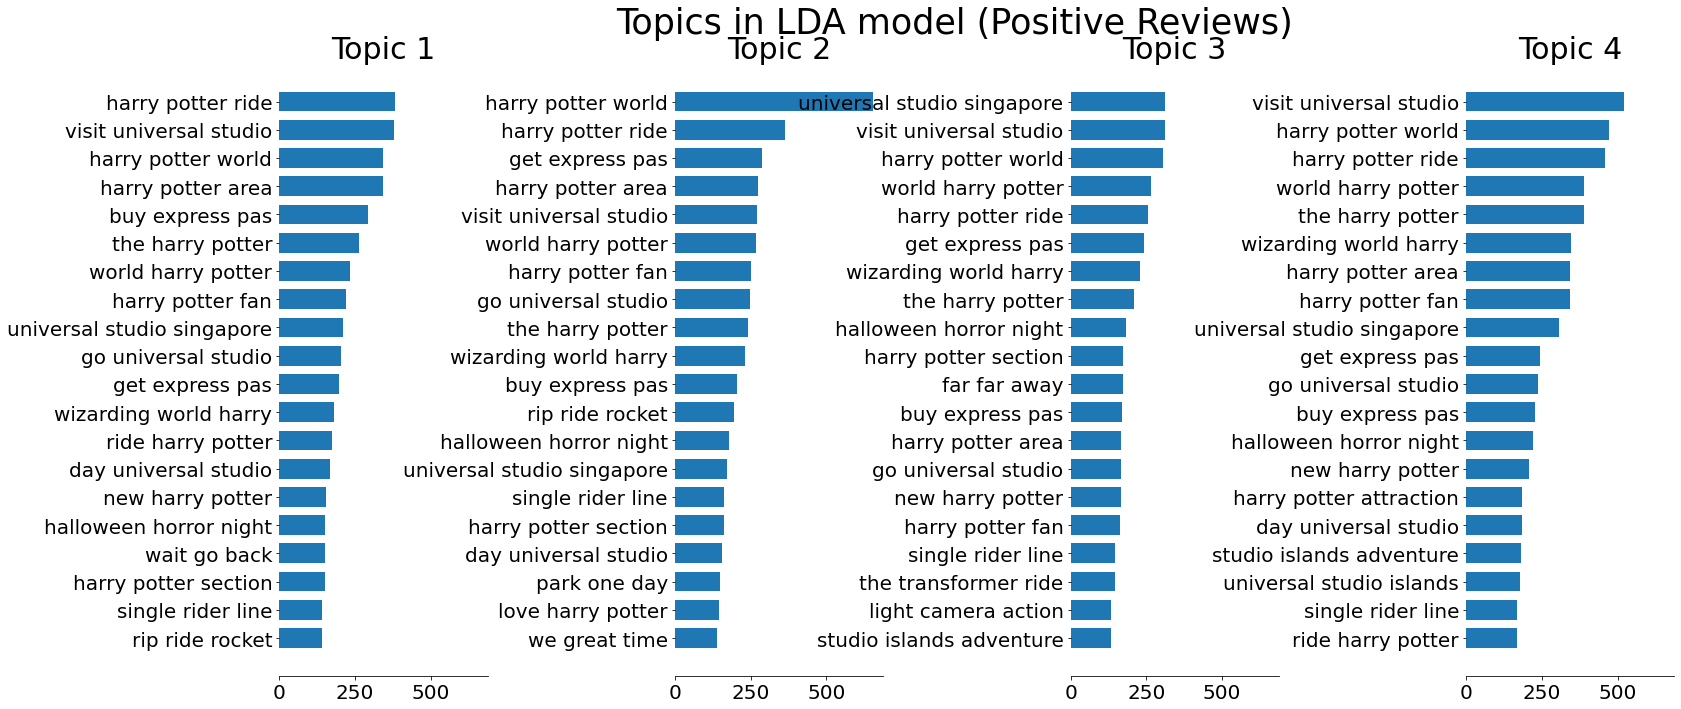

In [18]:
#Fitting LDA with trigrams with 4 topics
n_components = 4
n_top_words = 20

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 4, figsize=(25, 10), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=35)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
pos_3gram_vectorizer = CountVectorizer(ngram_range=(3,3))
pos_3gram = pos_3gram_vectorizer.fit_transform(dfmodel_pos['review_text'])

lda = LatentDirichletAllocation(n_components=n_components,
    learning_method="batch")
lda_output2=lda.fit(pos_3gram)

pos_3gram_feature_names = pos_3gram_vectorizer.get_feature_names()
plot_top_words(lda, pos_3gram_feature_names, n_top_words, "Topics in LDA model (Positive Reviews)")